# Pemetaan Karakteristik Kejahatan di London: Studi Klaster Berdasarkan Data MPS LSOA

**Anggota Tim:**
1. Salma Dewi Nataya (23/518235/PA/22243)
2. Melani Sulistiawati (23/523106/PA/22507)

# Data

Data yang digunakan dalam penelitian ini bersumber dari portal resmi milik Pemerintah Kota London, yaitu [London Datastore](https://data.london.gov.uk/dataset/recorded_crime_summary). Dataset yang diunduh berjudul **MPS LSOA Level Crime (Historical)** dan mencakup data kejahatan yang tercatat di wilayah London dari tanggal **1 April 2010 hingga 31 Maret 2023**. Data ini dikumpulkan oleh *Metropolitan Police Service* (MPS) dan disusun berdasarkan tingkat wilayah administratif terkecil di Inggris, yaitu **Lower Super Output Area (LSOA)**.

Pada data asli, setiap baris mewakili satu kombinasi unik antara LSOA, kategori besar kejahatan (*major category*), dan subkategori kejahatan (*minor category*), serta jumlah kasus kejahatan yang terjadi setiap bulannya. Untuk keperluan analisis clustering, data telah dimodifikasi dengan melakukan agregasi jumlah kasus kejahatan berdasarkan kategori besar (*major category*) untuk setiap LSOA. Hasil akhirnya berupa dataset yang berisi total kasus kejahatan selama beberapa tahun terakhir (terutama dari tahun 2019 hingga awal 2023) untuk masing-masing kategori kejahatan utama.

Berikut adalah penjelasan mengenai variabel-variabel dalam data hasil modifikasi:

- **LSOA Code**: Kode unik yang merepresentasikan wilayah LSOA.
- **Borough**: Kode dari borough atau wilayah administratif tempat LSOA tersebut berada (contoh: `E09000002` untuk Barking and Dagenham).
- **ARSON AND CRIMINAL DAMAGE**: Total kasus kejahatan yang termasuk dalam kategori pembakaran dan perusakan properti.
- **BURGLARY**: Total kasus pembobolan, baik rumah tinggal maupun tempat usaha.
- **DRUG OFFENCES**: Jumlah kasus terkait pelanggaran narkoba, termasuk kepemilikan dan penyelundupan.
- **MISCELLANEOUS CRIMES AGAINST SOCIETY**: Kejahatan lain terhadap masyarakat seperti penipuan, pemalsuan, atau pelanggaran peradilan.
- **POSSESSION OF WEAPONS**: Kasus kepemilikan senjata tajam atau senjata api ilegal.
- **PUBLIC ORDER OFFENCES**: Kejahatan yang mengganggu ketertiban umum seperti kerusuhan atau ujaran kebencian.
- **ROBBERY**: Total kasus perampokan properti milik pribadi maupun bisnis.
- **THEFT**: Kasus pencurian termasuk pencurian sepeda, dari toko, atau dari individu.
- **VEHICLE OFFENCES**: Pelanggaran terkait kendaraan bermotor seperti pencurian kendaraan atau perusakan.
- **VIOLENCE AGAINST THE PERSON**: Kejahatan terhadap individu seperti penyerangan atau kekerasan fisik.

Berikut disertakan *preview* data asli, proses modifikasi, dan data hasil modifikasi.

## Data Asli

In [1]:
import pandas as pd
df = pd.read_csv('E:/pendatmin/MPS LSOA Level Crime (Historical).csv')

In [2]:
df

LSOA Code                  LSOA Name    Borough  \
0       E01000006  Barking and Dagenham 016A  E09000002   
1       E01000006  Barking and Dagenham 016A  E09000002   
2       E01000006  Barking and Dagenham 016A  E09000002   
3       E01000006  Barking and Dagenham 016A  E09000002   
4       E01000006  Barking and Dagenham 016A  E09000002   
...           ...                        ...        ...   
113067  E01035722           Westminster 024G  E09000033   
113068  E01035722           Westminster 024G  E09000033   
113069  E01035722           Westminster 024G  E09000033   
113070  E01035722           Westminster 024G  E09000033   
113071  E01035722           Westminster 024G  E09000033   

                     Major Category                         Minor Category  \
0         ARSON AND CRIMINAL DAMAGE                                  ARSON   
1         ARSON AND CRIMINAL DAMAGE                        CRIMINAL DAMAGE   
2                          BURGLARY        BURGLARY BUSINESS AND COMMUNITY   
3                          BURGLARY                 BURGLARY IN A DWELLING   
4                     DRUG OFFENCES                    POSSESSION OF DRUGS   
...                             ...                                    ...   
113067             VEHICLE OFFENCES       INTERFERING WITH A MOTOR VEHICLE   
113068             VEHICLE OFFENCES                   THEFT FROM A VEHICLE   
113069             VEHICLE OFFENCES  THEFT OR UNAUTH TAKING OF A MOTOR VEH   
113070  VIOLENCE AGAINST THE PERSON                   VIOLENCE WITH INJURY   
113071  VIOLENCE AGAINST THE PERSON                VIOLENCE WITHOUT INJURY   

        201903  201904  201905  201906  201907  ...  202205  202206  202207  \
0            1       0       0       0       0  ...       0       0       0   
1            1       2       0       1       0  ...       0       0       2   
2            0       0       0       0       0  ...       0       0       0   
3            1       0       3       1       0  ...       0       0       0   
4            2       2       0       0       0  ...       2       0       0   
...        ...     ...     ...     ...     ...  ...     ...     ...     ...   
113067       0       0       0       1       0  ...       0       0       1   
113068       2       0       5       1       0  ...       0       1       1   
113069       0       0       0       0       0  ...       1       0       0   
113070       0       0       0       1       1  ...       1       1       2   
113071       0       2       2       2       2  ...       1       2       3   

        202208  202209  202210  202211  202212  202301  202302  
0            0       0       0       0       0       0       0  
1            1       0       0       0       0       0       0  
2            0       0       0       0       0       0       0  
3            0       0       0       2       0       0       0  
4            1       0       4       1       0       0       0  
...        ...     ...     ...     ...     ...     ...     ...  
113067       0       0       0       0       0       0       0  
113068       0       3       1       1       1       1       0  
113069       0       0       1       0       0       0       1  
113070       1       0       1       2       0       3       0  
113071       3       2       3       2       2       2       0  

[113072 rows x 160 columns]

## Modifikasi Data

Sebelum dilakukan analisis clustering, data asli perlu dimodifikasi agar sesuai dengan tujuan analisis, yaitu mengelompokkan wilayah berdasarkan total kasus kejahatan menurut kategori utama (*major category*). Data asli berbentuk long format, di mana setiap baris mewakili kombinasi unik dari `LSOA Code`, `Major Category`, `Minor Category`, dan jumlah kasus kejahatan per bulan. Oleh karena itu, dilakukan beberapa langkah transformasi sebagai berikut:

1. **Menghitung total kasus per baris**  
   Kolom-kolom bulan yang mencatat jumlah kasus di setiap periode dikombinasikan untuk menghasilkan satu kolom baru, yaitu `Total`, yang merepresentasikan total kejadian kejahatan per baris data.

2. **Mengagregasi total kasus berdasarkan wilayah dan kategori utama**  
   Data kemudian dikelompokkan berdasarkan `LSOA Code` dan `Major Category`, kemudian dijumlahkan total kasusnya untuk masing-masing kombinasi. Ini menghasilkan jumlah total kejadian kejahatan dari setiap kategori utama untuk masing-masing LSOA.

3. **Transformasi ke bentuk wide format**  
   Data yang sudah digabungkan dipivot agar setiap baris mewakili satu LSOA, dan setiap kolom mewakili satu kategori kejahatan utama. Nilai pada sel merupakan total kasus kejahatan dalam kategori tersebut. Kolom yang tidak memiliki kasus di suatu LSOA diisi dengan nol (`0`).

5. **Mengurutkan kolom agar lebih rapi**  
   Kolom `LSOA Code` dan `Borough` diletakkan di awal tabel, diikuti oleh kolom-kolom kategori kejahatan untuk memudahkan pembacaan dan analisis lebih lanjut.

Hasil akhir dari proses ini adalah sebuah dataset yang siap dianalisis menggunakan metode clustering, di mana masing-masing baris merupakan representasi unik dari satu wilayah LSOA dengan profil jumlah kasus kejahatan menurut kategori utama.


In [3]:
import pandas as pd

# Step 1: Hitung total kejadian per baris
month_cols = df.columns[5:]  # kolom bulan
df['Total'] = df[month_cols].sum(axis=1)

# Step 2: Jumlahkan total berdasarkan LSOA Code dan Major Category
grouped = df.groupby(['LSOA Code', 'Major Category'])['Total'].sum().reset_index()

# Step 3: Pivot ke bentuk wide (kolom = kategori kejahatan, isi = total kasus)
final_df = grouped.pivot(index='LSOA Code', columns='Major Category', values='Total').fillna(0)

# Step 4: Reset index
final_df = final_df.reset_index()

# Step 5: Tambahkan kolom Borough dari df
lsoa_borough = df[['LSOA Code', 'Borough']].drop_duplicates()
final_df = pd.merge(final_df, lsoa_borough, on='LSOA Code', how='left')

# Step 6: Urutkan kolom agar rapi
cols = ['LSOA Code', 'Borough'] + [col for col in final_df.columns if col not in ['LSOA Code', 'Borough']]
final_df = final_df[cols]

# Lihat hasil
final_df.head()

LSOA Code    Borough  ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
0  E01000006  E09000002                       93.0     142.0          120.0   
1  E01000007  E09000002                      367.0     172.0          646.0   
2  E01000008  E09000002                      212.0     127.0          210.0   
3  E01000009  E09000002                      273.0     183.0          486.0   
4  E01000011  E09000002                      127.0     105.0           91.0   

   MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
0                                  24.0                    6.0   
1                                  74.0                   70.0   
2                                  46.0                   20.0   
3                                  37.0                   28.0   
4                                  26.0                    8.0   

   PUBLIC ORDER OFFENCES  ROBBERY   THEFT  VEHICLE OFFENCES  \
0                   39.0     66.0   110.0             288.0   
1                  364.0    332.0  1306.0             288.0   
2                   93.0     81.0   574.0             419.0   
3                  170.0    251.0   620.0             305.0   
4                   40.0     63.0   132.0             169.0   

   VIOLENCE AGAINST THE PERSON  
0                        353.0  
1                       1598.0  
2                        598.0  
3                        961.0  
4                        497.0

In [ ]:
final_df.to_csv('E:/pendatmin/LSOA Level Crime.csv', index=False)

## Data Hasil Modifikasi

In [4]:
import pandas as pd
data = pd.read_csv('E:/pendatmin/LSOA Level Crime.csv')
data

LSOA Code    Borough  ARSON AND CRIMINAL DAMAGE  BURGLARY  \
0     E01000006  E09000002                      372.0     568.0   
1     E01000007  E09000002                     1468.0     688.0   
2     E01000008  E09000002                      848.0     508.0   
3     E01000009  E09000002                     1092.0     732.0   
4     E01000011  E09000002                      508.0     420.0   
...         ...        ...                        ...       ...   
4983  E01035718  E09000033                     1616.0    2364.0   
4984  E01035719  E09000033                      288.0     280.0   
4985  E01035720  E09000033                      408.0     340.0   
4986  E01035721  E09000033                     1380.0     908.0   
4987  E01035722  E09000033                      400.0     720.0   

      DRUG OFFENCES  MISCELLANEOUS CRIMES AGAINST SOCIETY  \
0             480.0                                  96.0   
1            2584.0                                 296.0   
2             840.0                                 184.0   
3            1944.0                                 148.0   
4             364.0                                 104.0   
...             ...                                   ...   
4983         9136.0                                 344.0   
4984          184.0                                  36.0   
4985          352.0                                  36.0   
4986         8748.0                                 312.0   
4987          440.0                                  40.0   

      POSSESSION OF WEAPONS  PUBLIC ORDER OFFENCES  ROBBERY    THEFT  \
0                      24.0                  156.0    264.0    440.0   
1                     280.0                 1456.0   1328.0   5224.0   
2                      80.0                  372.0    324.0   2296.0   
3                     112.0                  680.0   1004.0   2480.0   
4                      32.0                  160.0    252.0    528.0   
...                     ...                    ...      ...      ...   
4983                  472.0                 2236.0   3364.0  32224.0   
4984                   32.0                  268.0    104.0   1272.0   
4985                   32.0                  252.0     88.0   2348.0   
4986                  360.0                 1772.0    604.0  14048.0   
4987                  100.0                  308.0    308.0   1880.0   

      VEHICLE OFFENCES  VIOLENCE AGAINST THE PERSON  
0               1152.0                       1412.0  
1               1152.0                       6392.0  
2               1676.0                       2392.0  
3               1220.0                       3844.0  
4                676.0                       1988.0  
...                ...                          ...  
4983            5468.0                       7624.0  
4984             224.0                        996.0  
4985             380.0                        912.0  
4986            1384.0                       4920.0  
4987             868.0                       1460.0  

[4988 rows x 12 columns]

# Prapemrosesan Data

### EDA: Statistika Deskriptif

In [6]:
data.describe()

ARSON AND CRIMINAL DAMAGE      BURGLARY  DRUG OFFENCES  \
count                4988.000000   4988.000000    4988.000000   
mean                  612.238974    776.772253     483.460305   
std                   417.809741    470.157197     834.668574   
min                     8.000000     16.000000       4.000000   
25%                   360.000000    540.000000     164.000000   
50%                   532.000000    708.000000     312.000000   
75%                   752.000000    912.000000     552.000000   
max                  8412.000000  15200.000000   28208.000000   

       MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
count                           4988.000000            4988.000000   
mean                             102.274258              59.615076   
std                              492.281277              95.503660   
min                                0.000000               0.000000   
25%                               48.000000              20.000000   
50%                               72.000000              40.000000   
75%                              112.000000              72.000000   
max                            33888.000000            3412.000000   

       PUBLIC ORDER OFFENCES       ROBBERY         THEFT  VEHICLE OFFENCES  \
count            4988.000000   4988.000000    4988.00000       4988.000000   
mean              405.862871    300.730553    2219.97915       1030.826784   
std               501.043458    519.382968    7452.68128        647.965088   
min                16.000000      0.000000      56.00000          4.000000   
25%               176.000000    100.000000     500.00000        684.000000   
50%               284.000000    200.000000     876.00000        920.000000   
75%               464.000000    356.000000    1844.00000       1213.000000   
max             14452.000000  17020.000000  300960.00000      11240.000000   

       VIOLENCE AGAINST THE PERSON  
count                  4988.000000  
mean                   1871.049719  
std                    1720.239113  
min                      88.000000  
25%                     972.000000  
50%                    1558.000000  
75%                    2248.000000  
max                   47652.000000

### Feature Engineering

Dibuat variabel baru numerik, yaitu **Total Case**. Variabel ini dibentuk dengan menjumlahkan semua kolom numerik dalam satu baris (record) untuk mendapatkan total jumlah kasus kejahatan yang terjadi di setiap wilayah LSOA.

In [ ]:
# Feature Engineering

data['Total Case'] = data.select_dtypes(include='number').sum(axis=1)

### Modifikasi Variabel

Total kasus untuk setiap jenis kejahatan diubah menjadi proporsi terhadap jumlah total kasus kejahatan di wilayah tersebut. Hal ini dilakukan dengan pertimbangan bahwa proporsi lebih relevan dibanding nilai absolut saat ingin membandingkan karakteristik kejahatan antar wilayah dengan ukuran populasi atau tingkat kejahatan yang berbeda. Misalnya, suatu wilayah mungkin memiliki jumlah pencurian yang tinggi secara absolut, tetapi jika total kejahatannya juga tinggi, maka proporsi pencurian mungkin rendah. Normalisasi ini juga penting untuk mencegah bias dalam analisis seperti clustering, karena total kasus yang besar bisa mendominasi hasil tanpa normalisasi.

In [6]:
data.head()

LSOA Code    Borough  ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
0  E01000006  E09000002                      372.0     568.0          480.0   
1  E01000007  E09000002                     1468.0     688.0         2584.0   
2  E01000008  E09000002                      848.0     508.0          840.0   
3  E01000009  E09000002                     1092.0     732.0         1944.0   
4  E01000011  E09000002                      508.0     420.0          364.0   

   MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
0                                  96.0                   24.0   
1                                 296.0                  280.0   
2                                 184.0                   80.0   
3                                 148.0                  112.0   
4                                 104.0                   32.0   

   PUBLIC ORDER OFFENCES  ROBBERY   THEFT  VEHICLE OFFENCES  \
0                  156.0    264.0   440.0            1152.0   
1                 1456.0   1328.0  5224.0            1152.0   
2                  372.0    324.0  2296.0            1676.0   
3                  680.0   1004.0  2480.0            1220.0   
4                  160.0    252.0   528.0             676.0   

   VIOLENCE AGAINST THE PERSON  Total Case  
0                       1412.0      4964.0  
1                       6392.0     20868.0  
2                       2392.0      9520.0  
3                       3844.0     13256.0  
4                       1988.0      5032.0

In [8]:
# Salin dataframe jika perlu
df = data.copy()

# Ambil nama kolom-kolom kejahatan (dari kolom ke-3 sampai ke-12 = index 2 sampai 11)
crime_cols = data.columns[2:12]

# Ubah nilainya jadi proporsi dari Total Case
df[crime_cols] = df[crime_cols].div(df['Total Case'], axis=0)
df = df.drop(['Total Case', 'Borough'], axis=1)
df.set_index('LSOA Code', inplace=True)

# Lihat hasil
df.head()

ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
LSOA Code                                                       
E01000006                   0.074940  0.114424       0.096696   
E01000007                   0.070347  0.032969       0.123826   
E01000008                   0.089076  0.053361       0.088235   
E01000009                   0.082378  0.055220       0.146651   
E01000011                   0.100954  0.083466       0.072337   

           MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
LSOA Code                                                                
E01000006                              0.019339               0.004835   
E01000007                              0.014184               0.013418   
E01000008                              0.019328               0.008403   
E01000009                              0.011165               0.008449   
E01000011                              0.020668               0.006359   

           PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  \
LSOA Code                                                                
E01000006               0.031426  0.053183  0.088638          0.232071   
E01000007               0.069772  0.063638  0.250335          0.055204   
E01000008               0.039076  0.034034  0.241176          0.176050   
E01000009               0.051298  0.075739  0.187085          0.092034   
E01000011               0.031797  0.050079  0.104928          0.134340   

           VIOLENCE AGAINST THE PERSON  
LSOA Code                               
E01000006                     0.284448  
E01000007                     0.306306  
E01000008                     0.251261  
E01000009                     0.289982  
E01000011                     0.395072

In [9]:
data = df
data

ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
LSOA Code                                                       
E01000006                   0.074940  0.114424       0.096696   
E01000007                   0.070347  0.032969       0.123826   
E01000008                   0.089076  0.053361       0.088235   
E01000009                   0.082378  0.055220       0.146651   
E01000011                   0.100954  0.083466       0.072337   
...                              ...       ...            ...   
E01035718                   0.024920  0.036454       0.140883   
E01035719                   0.078176  0.076004       0.049946   
E01035720                   0.079254  0.066045       0.068376   
E01035721                   0.040074  0.026368       0.254036   
E01035722                   0.061312  0.110362       0.067443   

           MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
LSOA Code                                                                
E01000006                              0.019339               0.004835   
E01000007                              0.014184               0.013418   
E01000008                              0.019328               0.008403   
E01000009                              0.011165               0.008449   
E01000011                              0.020668               0.006359   
...                                         ...                    ...   
E01035718                              0.005305               0.007279   
E01035719                              0.009772               0.008686   
E01035720                              0.006993               0.006216   
E01035721                              0.009060               0.010454   
E01035722                              0.006131               0.015328   

           PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  \
LSOA Code                                                                
E01000006               0.031426  0.053183  0.088638          0.232071   
E01000007               0.069772  0.063638  0.250335          0.055204   
E01000008               0.039076  0.034034  0.241176          0.176050   
E01000009               0.051298  0.075739  0.187085          0.092034   
E01000011               0.031797  0.050079  0.104928          0.134340   
...                          ...       ...       ...               ...   
E01035718               0.034481  0.051875  0.496916          0.084320   
E01035719               0.072747  0.028230  0.345277          0.060803   
E01035720               0.048951  0.017094  0.456099          0.073815   
E01035721               0.051458  0.017540  0.407945          0.040190   
E01035722               0.047210  0.047210  0.288167          0.133047   

           VIOLENCE AGAINST THE PERSON  
LSOA Code                               
E01000006                     0.284448  
E01000007                     0.306306  
E01000008                     0.251261  
E01000009                     0.289982  
E01000011                     0.395072  
...                                ...  
E01035718                     0.117567  
E01035719                     0.270358  
E01035720                     0.177156  
E01035721                     0.142874  
E01035722                     0.223789  

[4988 rows x 10 columns]

# Exploratory Data Analysis (EDA)

Pada tahapan ini, Anda diwajibkan melakukan EDA minimal sebanyak 3 buah.

## Statistika Deskriptif Sebaran Proporsi Jenis Kejahatan

In [14]:
crime_cols = data.columns
data[crime_cols].describe()

ARSON AND CRIMINAL DAMAGE     BURGLARY  DRUG OFFENCES  \
count                4988.000000  4988.000000    4988.000000   
mean                    0.090012     0.126790       0.057140   
std                     0.026151     0.052741       0.029872   
min                     0.014339     0.013180       0.003322   
25%                     0.072707     0.089501       0.036456   
50%                     0.088481     0.117729       0.051395   
75%                     0.105611     0.156909       0.070743   
max                     0.228814     0.377152       0.280333   

       MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
count                           4988.000000            4988.000000   
mean                               0.013024               0.007109   
std                                0.008723               0.004150   
min                                0.000000               0.000000   
25%                                0.009320               0.004233   
50%                                0.012253               0.006590   
75%                                0.015296               0.009410   
max                                0.253782               0.065970   

       PUBLIC ORDER OFFENCES      ROBBERY        THEFT  VEHICLE OFFENCES  \
count            4988.000000  4988.000000  4988.000000       4988.000000   
mean                0.050009     0.035289     0.195804          0.166940   
std                 0.015273     0.017621     0.116462          0.072913   
min                 0.007937     0.000000     0.044586          0.008475   
25%                 0.039681     0.022014     0.111111          0.114160   
50%                 0.049395     0.033129     0.158303          0.158256   
75%                 0.059438     0.045948     0.243466          0.211212   
max                 0.189474     0.136831     0.724255          0.505277   

       VIOLENCE AGAINST THE PERSON  
count                  4988.000000  
mean                      0.257884  
std                       0.071112  
min                       0.055409  
25%                       0.207787  
50%                       0.259569  
75%                       0.306630  
max                       0.630056

## Swarm Plot Perbandingan Proporsi Kategori Kejahatan

In [14]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

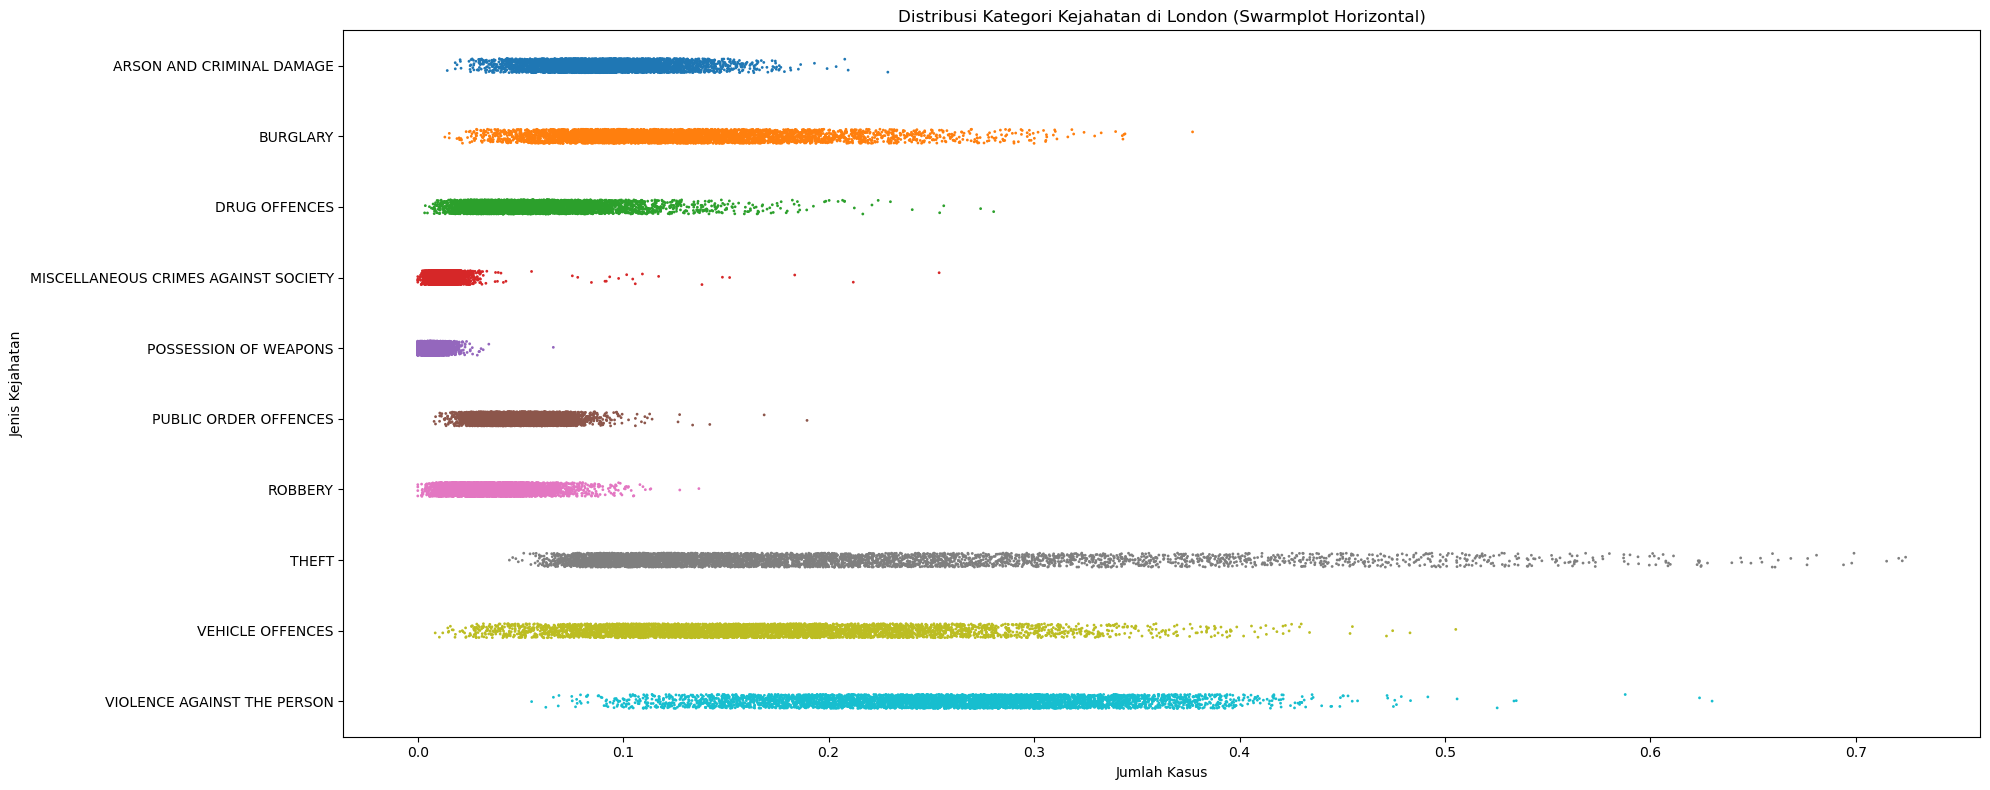

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom-kolom kriminalitas 
crime_cols = data.columns

# Buat boxplot horizontal
plt.figure(figsize=(20, 8))
sns.stripplot(data=data[crime_cols], orient='h', jitter=True, size=2)

plt.title("Distribusi Kategori Kejahatan di London (Swarmplot Horizontal)")
plt.xlabel("Jumlah Kasus")
plt.ylabel("Jenis Kejahatan")
plt.tight_layout()
plt.show()

## Box Plot Perbandingan Proporsi Kategori Kejahatan

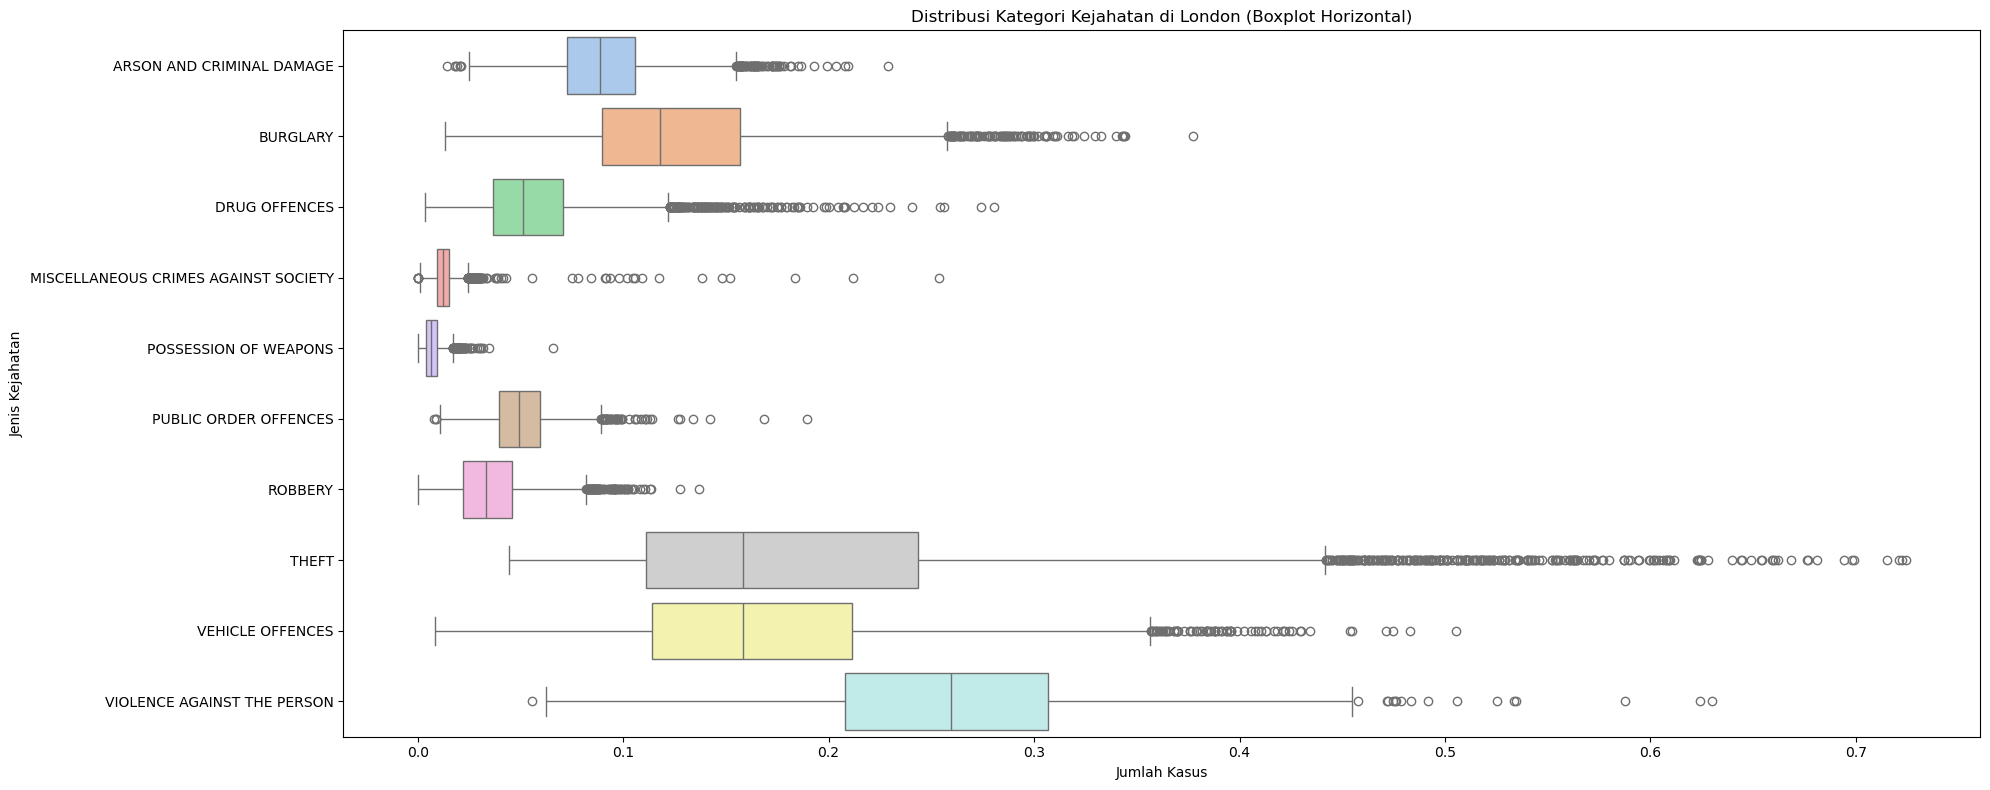

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom-kolom kriminalitas 
crime_cols = data.columns

# Buat boxplot horizontal
plt.figure(figsize=(20, 8))
sns.boxplot(data=data[crime_cols], orient='h', palette="pastel")

plt.title("Distribusi Kategori Kejahatan di London (Boxplot Horizontal)")
plt.xlabel("Jumlah Kasus")
plt.ylabel("Jenis Kejahatan")
plt.tight_layout()
plt.show()

## Korelasi Antarjenis Kejahatan

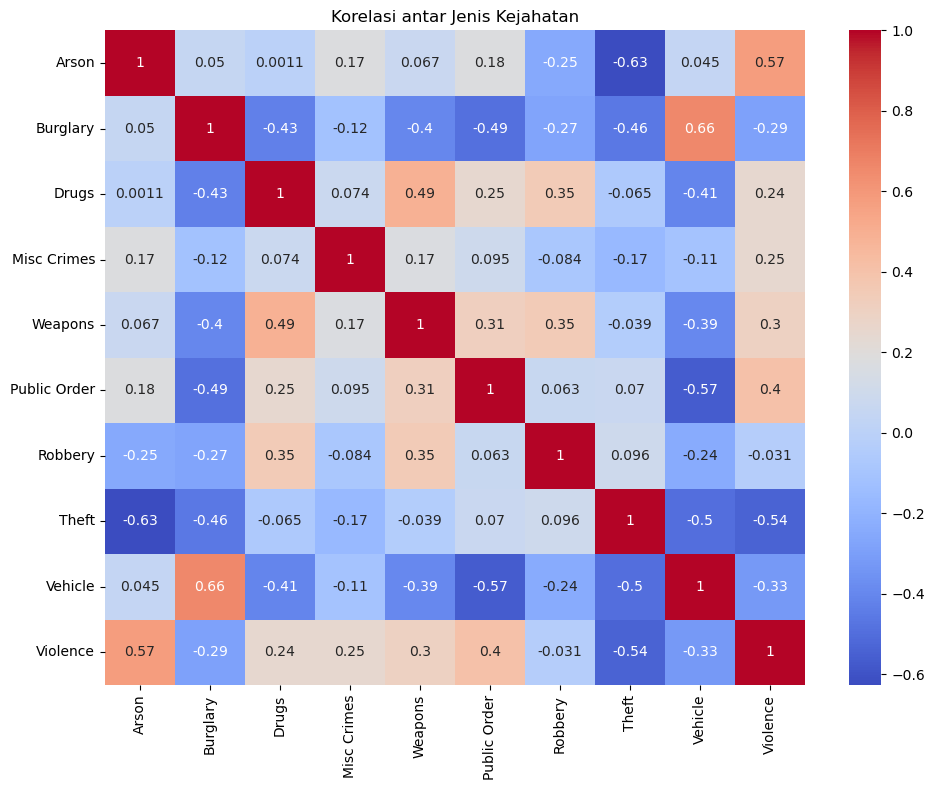

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat mapping singkatan
short_names = {
    'ARSON AND CRIMINAL DAMAGE': 'Arson',
    'BURGLARY': 'Burglary',
    'DRUG OFFENCES': 'Drugs',
    'MISCELLANEOUS CRIMES AGAINST SOCIETY': 'Misc Crimes',
    'POSSESSION OF WEAPONS': 'Weapons',
    'PUBLIC ORDER OFFENCES': 'Public Order',
    'ROBBERY': 'Robbery',
    'THEFT': 'Theft',
    'VEHICLE OFFENCES': 'Vehicle',
    'VIOLENCE AGAINST THE PERSON': 'Violence'
}

# Ambil data kolom kejahatan
crime_data = data.iloc[:, :].rename(columns=short_names)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crime_data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Jenis Kejahatan")
plt.tight_layout()
plt.show()

## Clustering

Modelling dilakukan dengan skema sebagai berikut.
1. Skema 1: modelling tanpa feature selection maupun dimensionality reduction
2. Skema 2: modelling dengan feature selection atau dimensionality reduction (hanya salah satu yang digunakan)

### Mini Preprocessing: Standarisasi Data

In [10]:
from sklearn.preprocessing import StandardScaler

# Pisahkan kolom numerik yang ingin di-scale (kecuali kolom terakhir)
cols_to_scale = data.columns  # semua kolom kecuali kolom terakhir

# Scaling
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(data[cols_to_scale]), 
                      columns=cols_to_scale, 
                      index=data.index)

# Gabungkan kembali dengan kolom terakhir (tanpa scaling)
dat = pd.concat([scaled], axis=1)

dat.head()

ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
LSOA Code                                                       
E01000006                  -0.576424 -0.234491       1.324338   
E01000007                  -0.752060 -1.779089       2.232637   
E01000008                  -0.035817 -1.392398       1.041068   
E01000009                  -0.291963 -1.357148       2.996802   
E01000011                   0.418445 -0.821538       0.508797   

           MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
LSOA Code                                                                
E01000006                              0.724055              -0.548118   
E01000007                              0.133068               1.520234   
E01000008                              0.722736               0.311854   
E01000009                             -0.213124               0.322853   
E01000011                              0.876362              -0.180737   

           PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  \
LSOA Code                                                                
E01000006              -1.216856  1.015638 -0.920274          0.893359   
E01000007               1.294140  1.609049  0.468283         -1.532603   
E01000008              -0.715951 -0.071228  0.389632          0.124964   
E01000009               0.084378  2.295882 -0.074872         -1.027435   
E01000011              -1.192612  0.839496 -0.780383         -0.447147   

           VIOLENCE AGAINST THE PERSON  
LSOA Code                               
E01000006                     0.373591  
E01000007                     0.680998  
E01000008                    -0.093147  
E01000009                     0.451417  
E01000011                     1.929361

### Skema 1: Tanpa Dimension Reduction

#### K-Means

In [12]:
df_km = dat.copy()

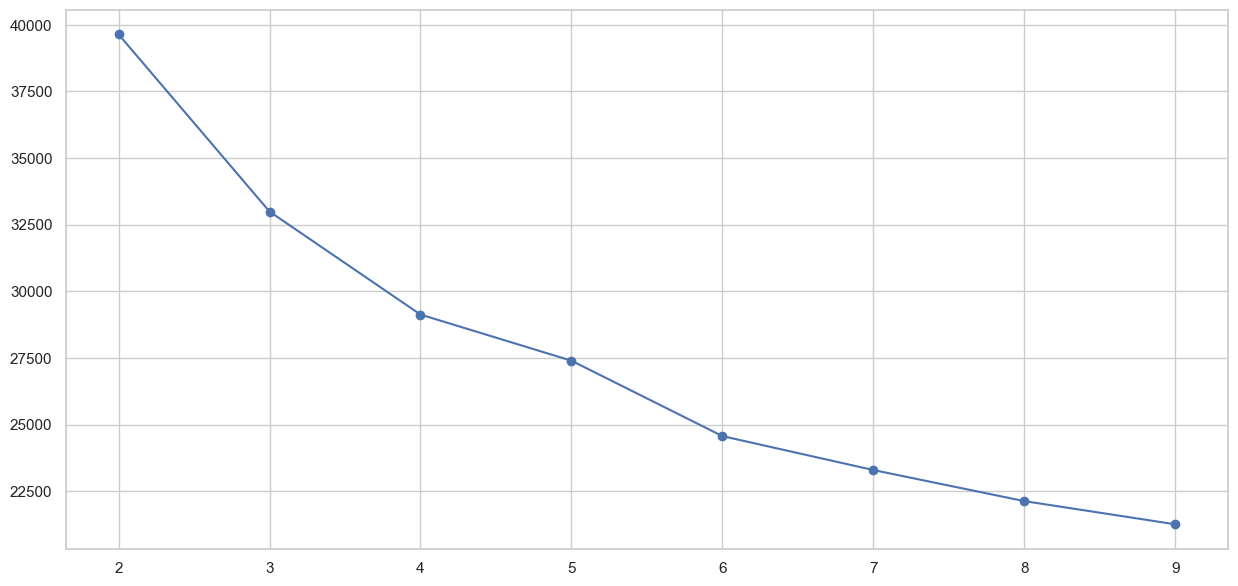

In [15]:
# Membuat grafik untuk menentukan jumlah k yang optimal

from sklearn.cluster import KMeans
inertia = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 26)
    kmeans.fit(df_km)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 7))

plt.plot(range(2,10), inertia, 'bo-')

In [22]:
inertia

[35024.18063758977,
 30032.51908017284,
 26534.71334214769,
 24860.783641960974,
 22007.81191555356,
 20848.727284667024,
 19832.209438855683,
 19077.408287967213]

##### Penentuan Jumlah Cluster dengan Elbow Method

Dengan *Elbow Method*, berdasarkan grafik nilai *inertia*, diketahui titik yang diawali penurunan tajam dan dilanjutkan dengan penurunan landai adalah titik 5. Dengan demikian, ditetapkan jumlah cluster optimal adalah 5 untuk K-Means.

In [16]:
# K-Means
df_km = dat.copy()

kmeans = KMeans(n_clusters = 4, random_state = 26)
kmeans.fit(df_km)

KMeans(n_clusters=4, random_state=26)

In [17]:
# Menambahkan label klaster ke dalam data

df_km['Cluster'] = kmeans.labels_
df_km.head()

ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
LSOA Code                                                       
E01000006                  -0.576424 -0.234491       1.324338   
E01000007                  -0.752060 -1.779089       2.232637   
E01000008                  -0.035817 -1.392398       1.041068   
E01000009                  -0.291963 -1.357148       2.996802   
E01000011                   0.418445 -0.821538       0.508797   

           MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
LSOA Code                                                                
E01000006                              0.724055              -0.548118   
E01000007                              0.133068               1.520234   
E01000008                              0.722736               0.311854   
E01000009                             -0.213124               0.322853   
E01000011                              0.876362              -0.180737   

           PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  \
LSOA Code                                                                
E01000006              -1.216856  1.015638 -0.920274          0.893359   
E01000007               1.294140  1.609049  0.468283         -1.532603   
E01000008              -0.715951 -0.071228  0.389632          0.124964   
E01000009               0.084378  2.295882 -0.074872         -1.027435   
E01000011              -1.192612  0.839496 -0.780383         -0.447147   

           VIOLENCE AGAINST THE PERSON  Cluster  
LSOA Code                                        
E01000006                     0.373591        3  
E01000007                     0.680998        3  
E01000008                    -0.093147        3  
E01000009                     0.451417        3  
E01000011                     1.929361        2

##### Visualisasi Cluster dengan PCA

In [18]:
# Gunakan Dimensionality Reduction untuk mempermudah melakukan visualisasi

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_pca = pd.DataFrame(pca.fit_transform(df_km.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = df_km.index)

df_pca = pd.concat([df_pca, df_km.Cluster], axis = 1)

df_pca.head(10)

PC_1      PC_2  Cluster
LSOA Code                             
E01000006  0.201232 -0.341911        3
E01000007 -3.978890  0.933499        3
E01000008 -0.882791  0.336989        3
E01000009 -2.927351  0.704503        3
E01000011 -1.020569 -1.318845        2
E01000012 -1.848701 -1.117557        3
E01000013 -2.125292  0.967123        3
E01000014 -0.627585 -2.047854        2
E01000015 -0.651371 -2.148800        2
E01000016  0.386846 -0.709526        2

<Axes: xlabel='PC_1', ylabel='PC_2'>

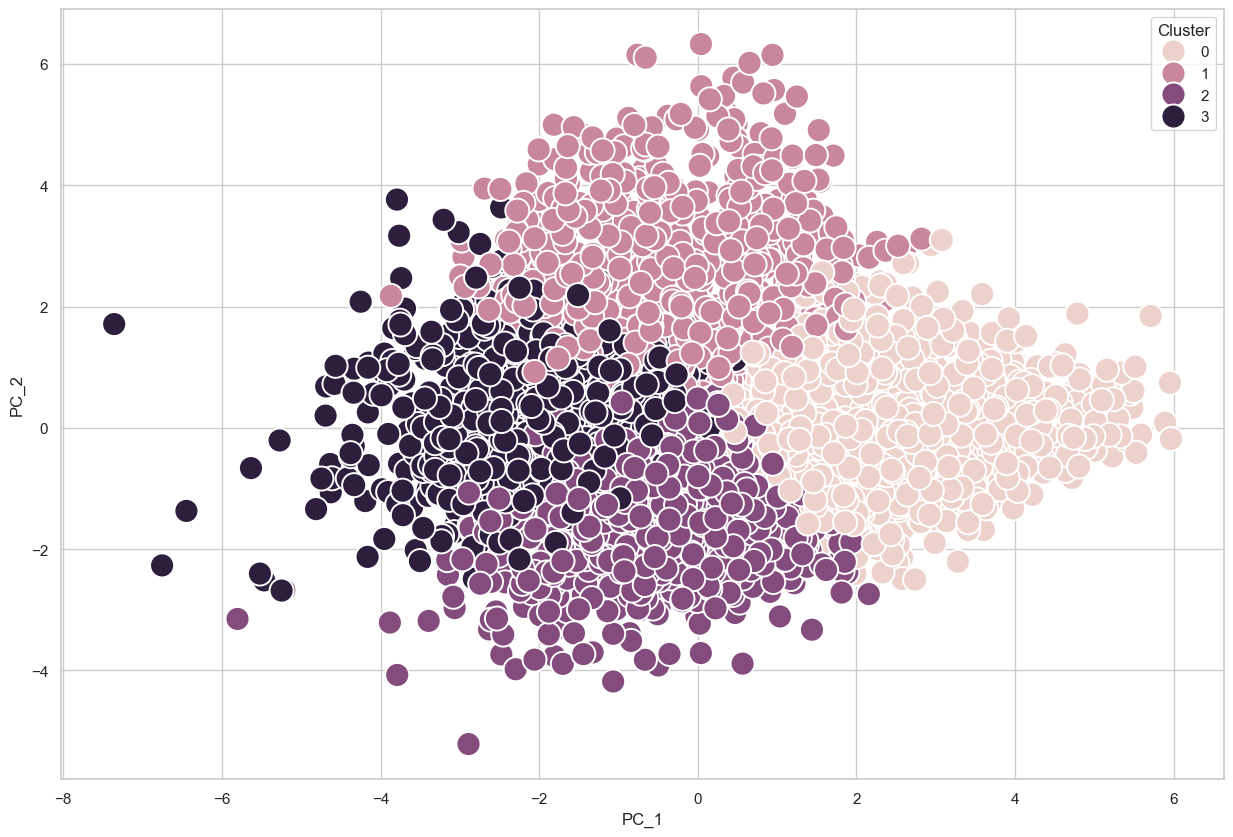

In [19]:
import seaborn as sb

# Visualisasi hasil clustering
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data = df_pca, x = 'PC_1', y = 'PC_2', hue = 'Cluster', s = 300, ax = ax)

In [20]:
df_km['Cluster'].value_counts()

Cluster
2    1557
0    1320
3    1305
1     806
Name: count, dtype: int64

#### K-Median

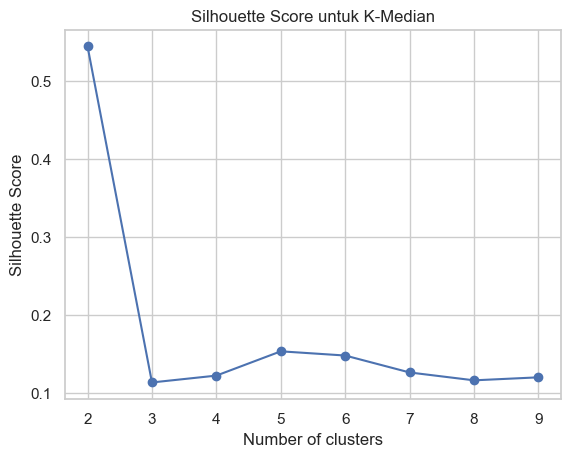

In [21]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

df_kme = dat.values.tolist()  # data harus list of lists

silhouette_avg = []

for k in range(2, 10):
    # Tentukan initial medians secara acak, misal ambil k data pertama
    initial_medians = df_kme[:k]

    kmedians_instance = kmedians(df_kme, initial_medians)
    kmedians_instance.process()
    clusters = kmedians_instance.get_clusters()
    medians = kmedians_instance.get_medians()

    # Membuat label array dari clusters
    labels = np.empty(len(df_kme))
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id

    # Hitung silhouette score, metric='manhattan' cocok untuk k-median
    score = silhouette_score(np.array(df_kme), labels, metric='manhattan')
    silhouette_avg.append(score)

plt.plot(range(2, 10), silhouette_avg, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk K-Median')
plt.show()

##### Penentuan Jumlah Cluster dengan Silhouette Method

Dengan *Silhouette Method*, berdasarkan grafik nilai *silhouette*, diketahui titik yang memiliki nilai paling tinggi adalah adalah titik 2. Namun, dengan mempertimbangkan proporsi *cluster* yang sangat timpang pada pembagian 2 *cluster*, dipertimbangkan titik dengan nilai *silhouette* paling tinggi kedua, yaitu titik 4. Dengan demikian, ditetapkan jumlah cluster optimal adalah 4 untuk K-Medians.

In [22]:
# Gunakan kmeans_plusplus untuk membuat centroid awal
df_kme2 = dat.copy()

from sklearn.cluster import kmeans_plusplus

initial_centroids = kmeans_plusplus(df_kme2.values, n_clusters = 2, random_state=0)[0]
initial_centroids

array([[-2.22025989, -1.01863189,  1.53908233,  0.04559176,  0.03229212,
        -0.74972534, -0.2375322 ,  2.95618437, -1.67908242, -1.98193316],
       [-0.71228025,  1.51372444,  0.03007738, -0.22888562,  0.24485972,
        -0.61437478,  2.14768676, -0.18625206,  0.24966928, -1.21074493]])

In [23]:
# Gunakan kmedians dari library pyclustering

from pyclustering.cluster.kmedians import kmedians

k_median = kmedians(df_kme2, initial_centroids)
k_median.process();

In [ ]:
import numpy as np

In [24]:
# Mendaftarkan label hasil klaster kmedian

clusters = k_median.get_clusters()

label = np.zeros([data.shape[0]])
label[clusters[0]] = 0
label[clusters[1]] = 1
# label[clusters[2]] = 2
# label[clusters[3]] = 3

label

array([0., 0., 0., ..., 0., 0., 0.])

##### Visualisasi Cluster dengan PCA

In [25]:
# Masukkan klaster ke dalam data

df_pca['Cluster'] = label.astype(int)
df_pca.head()

PC_1      PC_2  Cluster
LSOA Code                             
E01000006  0.201232 -0.341911        0
E01000007 -3.978890  0.933499        0
E01000008 -0.882791  0.336989        0
E01000009 -2.927351  0.704503        0
E01000011 -1.020569 -1.318845        0

<Axes: xlabel='PC_1', ylabel='PC_2'>

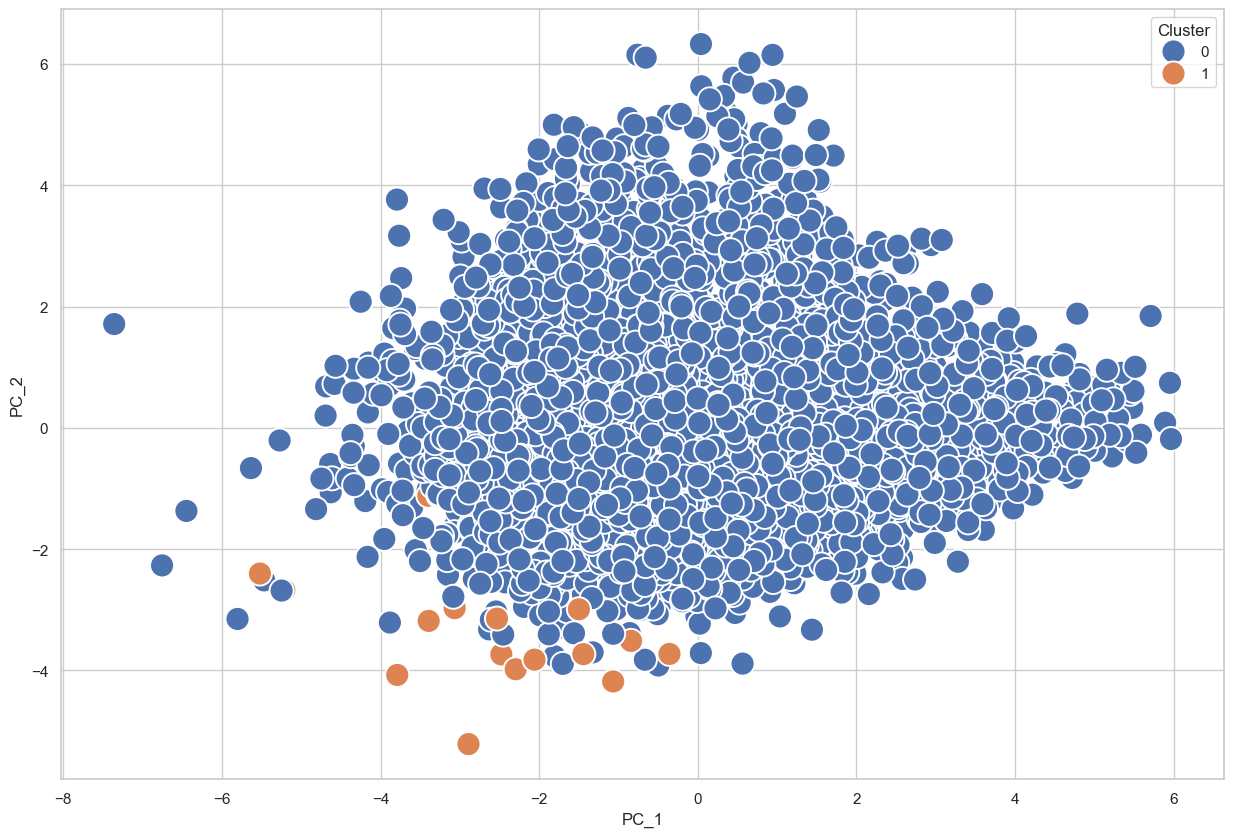

In [26]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data = df_pca, x = 'PC_1', y = 'PC_2', hue = 'Cluster', s = 300, ax = ax)

In [27]:
df_pca['Cluster'].value_counts()

Cluster
0    4969
1      19
Name: count, dtype: int64

#### Agglomerative Clustering

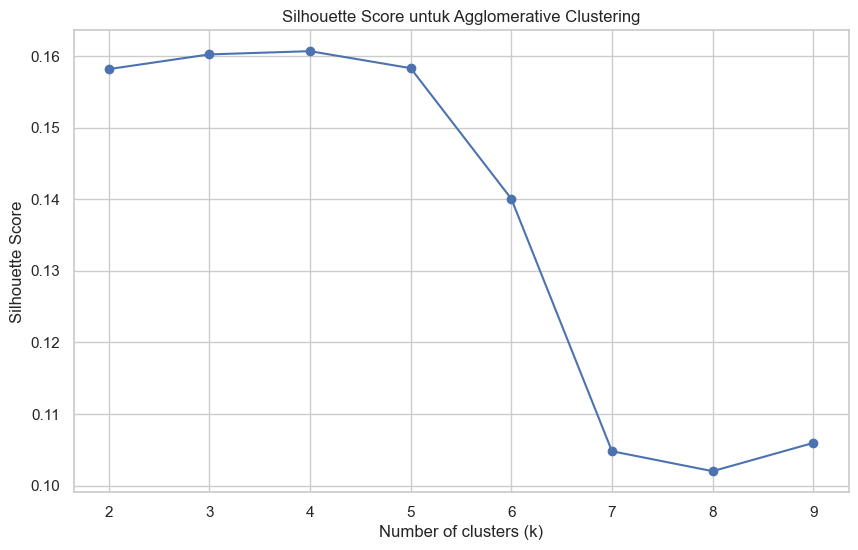

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Misal datamu sudah dalam DataFrame df_km dan dalam bentuk numerik
X = dat.values  # pastikan isinya numeric

silhouette_avg = []

for k in range(2, 10):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')  # linkage bisa 'ward', 'average', 'complete', 'single'
    labels = agglo.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')  # atau ganti 'manhattan' jika linkage bukan 'ward'
    silhouette_avg.append(score)

# Plot silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_avg, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Agglomerative Clustering')
plt.grid(True)
plt.show()

##### Penentuan Jumlah Cluster dengan Silhouette Method

Dengan *Silhouette Method*, berdasarkan grafik nilai *silhouette*, diketahui titik yang memiliki nilai paling tinggi adalah adalah titik 5. Dengan demikian, ditetapkan jumlah cluster optimal adalah 5 untuk Agglomerative Hierarchical Clustering.

In [29]:
from sklearn.cluster import AgglomerativeClustering

# Final clustering dengan 5 cluster
df_agg = dat.copy()
agglo_final = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = agglo_final.fit_predict(df_agg)

# Tambahkan label ke dataframe kalau mau
df_agg['cluster'] = cluster_labels

##### Visualisasi Cluster dengan PCA

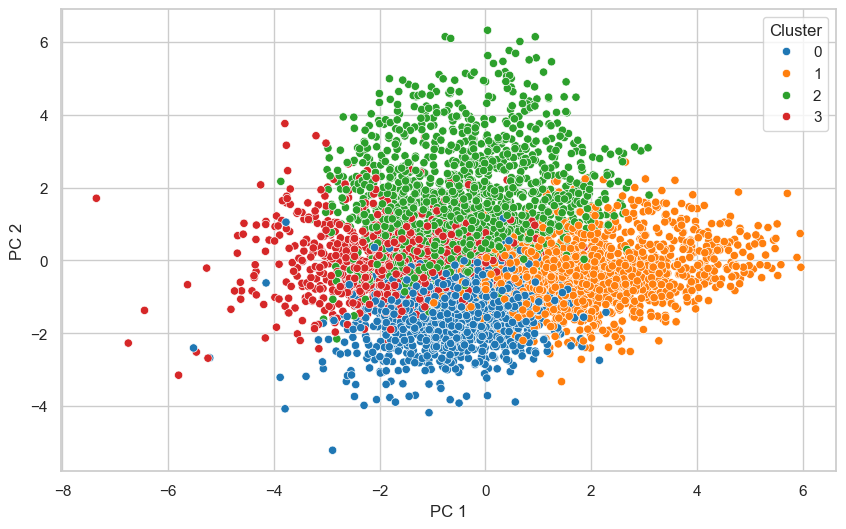

In [32]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_agg.drop(columns='cluster'))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df_agg['cluster'], palette='tab10')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

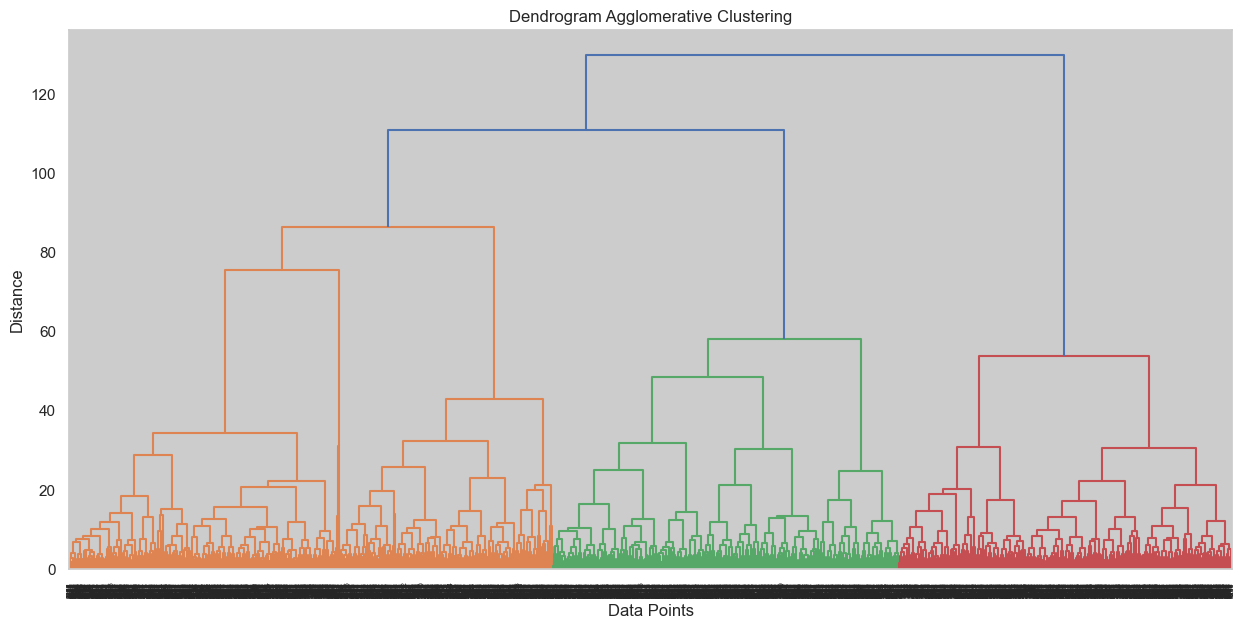

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Pastikan data dalam bentuk array
X = df_agg.drop(columns='cluster', errors='ignore').values  # hapus kolom cluster kalau sudah ada

# Buat linkage matrix (ward linkage untuk hasil yang sesuai dengan AgglomerativeClustering)
linked = linkage(X, method='ward')  # Bisa juga 'average', 'complete', 'single'

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,  # True kalau ingin lihat titik-titik datanya
           truncate_mode='level',   # Bisa ubah ke 'lastp' untuk hanya sebagian besar cluster
           p=30                     # Hanya tampilkan 30 cabang atas
          )
plt.title('Dendrogram Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


In [33]:
# Cek jumlah data di tiap cluster
print(df_agg['cluster'].value_counts().sort_index())

cluster
0    1160
1    1427
2    1484
3     917
Name: count, dtype: int64


#### Gaussian Mixture Model (GMM)

In [43]:
df_gmm = dat.copy()

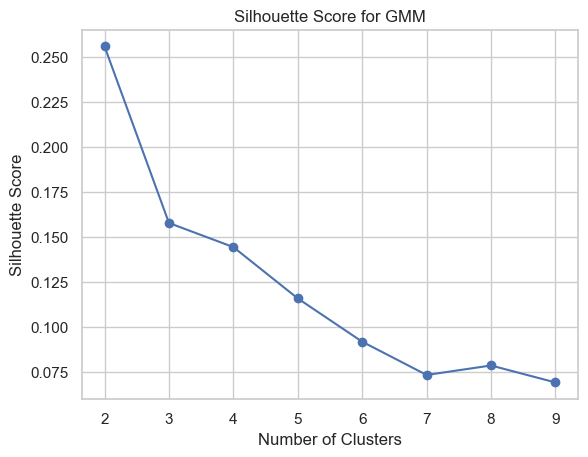

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(df_gmm)
    score = silhouette_score(df_gmm, labels)
    scores.append(score)

plt.plot(range(2, 10), scores, marker='o')
plt.title('Silhouette Score for GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### Penentuan Jumlah Cluster dengan Silhouette Method

Dengan *Silhouette Method*, berdasarkan grafik nilai *silhouette*, diketahui titik yang memiliki nilai paling tinggi adalah adalah titik 2. Dengan demikian, ditetapkan jumlah cluster optimal adalah 2 untuk Gaussian Mixture Model.

In [36]:
# GMM
gmm = GaussianMixture(n_components = 2)
gmm.fit(df_gmm)

GaussianMixture(n_components=2)

In [37]:
df_gmm['klaster'] = gmm.predict(df_gmm)

print(df_gmm.klaster.value_counts())
df_gmm.head()

klaster
1    4173
0     815
Name: count, dtype: int64


ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
LSOA Code                                                       
E01000006                  -0.576424 -0.234491       1.324338   
E01000007                  -0.752060 -1.779089       2.232637   
E01000008                  -0.035817 -1.392398       1.041068   
E01000009                  -0.291963 -1.357148       2.996802   
E01000011                   0.418445 -0.821538       0.508797   

           MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
LSOA Code                                                                
E01000006                              0.724055              -0.548118   
E01000007                              0.133068               1.520234   
E01000008                              0.722736               0.311854   
E01000009                             -0.213124               0.322853   
E01000011                              0.876362              -0.180737   

           PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  \
LSOA Code                                                                
E01000006              -1.216856  1.015638 -0.920274          0.893359   
E01000007               1.294140  1.609049  0.468283         -1.532603   
E01000008              -0.715951 -0.071228  0.389632          0.124964   
E01000009               0.084378  2.295882 -0.074872         -1.027435   
E01000011              -1.192612  0.839496 -0.780383         -0.447147   

           VIOLENCE AGAINST THE PERSON  klaster  
LSOA Code                                        
E01000006                     0.373591        1  
E01000007                     0.680998        1  
E01000008                    -0.093147        1  
E01000009                     0.451417        0  
E01000011                     1.929361        1

In [38]:
# Dapatkan peluang setiap titik data
prob = gmm.predict_proba(dat)

df_gmm2 = df_gmm.copy()
# Tambahkan kolom peluang
for i in range(prob.shape[1]):
    df_gmm2[f'cluster_{i}_probability'] = prob[:, i]

df_gmm2.head(10)

ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  \
LSOA Code                                                       
E01000006                  -0.576424 -0.234491       1.324338   
E01000007                  -0.752060 -1.779089       2.232637   
E01000008                  -0.035817 -1.392398       1.041068   
E01000009                  -0.291963 -1.357148       2.996802   
E01000011                   0.418445 -0.821538       0.508797   
E01000012                   0.608081 -1.195341       1.305849   
E01000013                  -0.293817 -1.071554       1.256312   
E01000014                   1.733790 -0.373448       0.044721   
E01000015                   1.682574 -0.375609       0.443372   
E01000016                   1.217895 -0.497896      -0.204621   

           MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  \
LSOA Code                                                                
E01000006                              0.724055              -0.548118   
E01000007                              0.133068               1.520234   
E01000008                              0.722736               0.311854   
E01000009                             -0.213124               0.322853   
E01000011                              0.876362              -0.180737   
E01000012                              0.334148               1.755970   
E01000013                              0.019710               0.498911   
E01000014                             -0.287905               0.028447   
E01000015                              0.120707              -0.084956   
E01000016                             -0.358011              -0.612009   

           PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  \
LSOA Code                                                                
E01000006              -1.216856  1.015638 -0.920274          0.893359   
E01000007               1.294140  1.609049  0.468283         -1.532603   
E01000008              -0.715951 -0.071228  0.389632          0.124964   
E01000009               0.084378  2.295882 -0.074872         -1.027435   
E01000011              -1.192612  0.839496 -0.780383         -0.447147   
E01000012              -0.783357  1.002776 -0.842574          0.136120   
E01000013               0.313115  1.090604  0.658779         -1.164480   
E01000014               0.253256 -0.212904 -0.953604         -0.117899   
E01000015              -0.583153 -0.213240 -0.975499         -0.366735   
E01000016              -0.781100 -0.619616  0.005948         -0.002006   

           VIOLENCE AGAINST THE PERSON  klaster  cluster_0_probability  \
LSOA Code                                                                
E01000006                     0.373591        1               0.007716   
E01000007                     0.680998        1               0.372468   
E01000008                    -0.093147        1               0.105764   
E01000009                     0.451417        0               0.939188   
E01000011                     1.929361        1               0.000623   
E01000012                     1.130993        1               0.002293   
E01000013                     0.121099        1               0.163115   
E01000014                     1.335224        1               0.000171   
E01000015                     1.615407        1               0.000064   
E01000016                     0.400580        1               0.000889   

           cluster_1_probability  
LSOA Code                         
E01000006               0.992284  
E01000007               0.627532  
E01000008               0.894236  
E01000009               0.060812  
E01000011               0.999377  
E01000012               0.997707  
E01000013               0.836885  
E01000014               0.999829  
E01000015               0.999936  
E01000016               0.999111

##### Visualisasi Cluster dengan PCA

56.09422309737588 %


<Axes: xlabel='PC_1', ylabel='PC_2'>

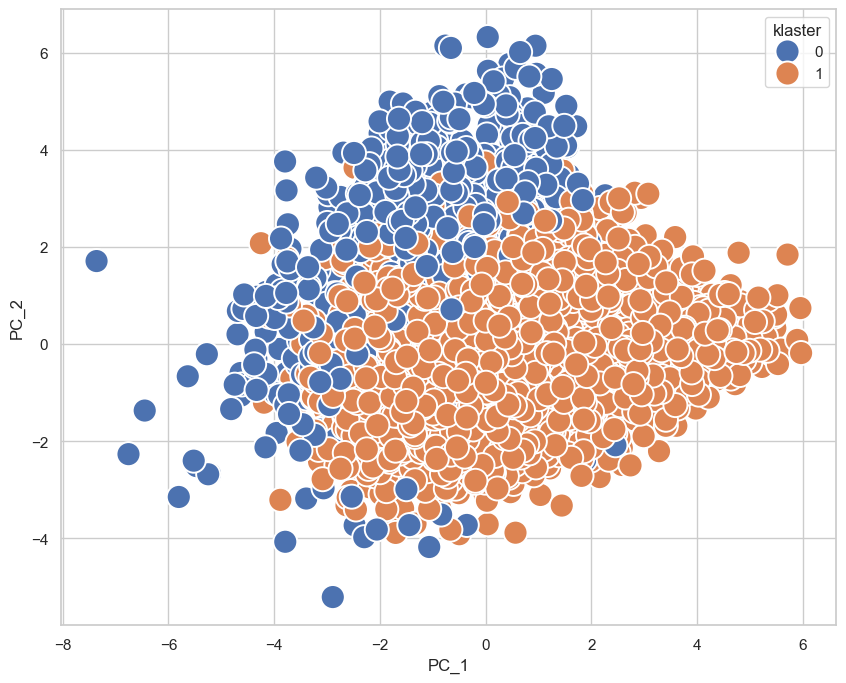

In [39]:
# Gunakan Dimensionality Reduction dengan PCA untuk mempermudah melakukan visualisasi

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_pca2 = pd.DataFrame(pca.fit_transform(df_gmm.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = df_gmm.index)

df_pca2 = pd.concat([df_pca2, df_gmm.klaster], axis = 1)
# df_pca1.head()

print(np.sum(pca.explained_variance_ratio_)*100, "%") # 2 Dimensi dapat menjelaskan keseluruhan fitur
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(data = df_pca2, x = 'PC_1', y = 'PC_2', hue = 'klaster', s = 300, ax = ax)

### Skema 2: dengan Dimension Reduction PCA

#### Proses PCA

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Pisahkan variabel kategorik
data_numerik = dat.iloc[:, :-1]
data_kategorik = dat.iloc[:, -1]  # diasumsikan kolom paling belakang

# 2. Standarisasi data numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_numerik)

# 3. PCA full dulu untuk lihat variance explained
pca = PCA()
pca.fit(X_scaled)

cum_pve = pca.explained_variance_ratio_.cumsum()

# 4. Pilih jumlah komponen berdasarkan 90% cumulative variance
tau = 0.90
n_components = np.argmax(cum_pve >= tau) + 1

print(f'Jumlah komponen untuk mencapai {int(tau*100)}% variance: {n_components}')

# 5. PCA dengan n_components optimal
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)


Jumlah komponen untuk mencapai 90% variance: 6


In [47]:
X_pca

array([[ 0.32812971,  0.23401751,  1.81103921,  1.05890269,  0.50016753,
        -1.35374716],
       [-4.0370669 ,  0.09707465,  1.0704767 , -0.03254802,  0.23449853,
        -0.26337411],
       [-0.97402963,  0.08353854,  0.24217537,  0.93871227,  1.00397665,
        -0.50605379],
       ...,
       [-1.45357085, -1.8014982 , -1.44951846, -0.29909749,  1.28860623,
        -0.02231778],
       [-4.75872246, -0.91429155,  1.25198531,  0.13637152,  5.45033338,
        -1.25759288],
       [-1.56609315, -0.9775186 ,  1.19397994, -0.06569294,  0.18424441,
         1.53022117]])

#### K-Means

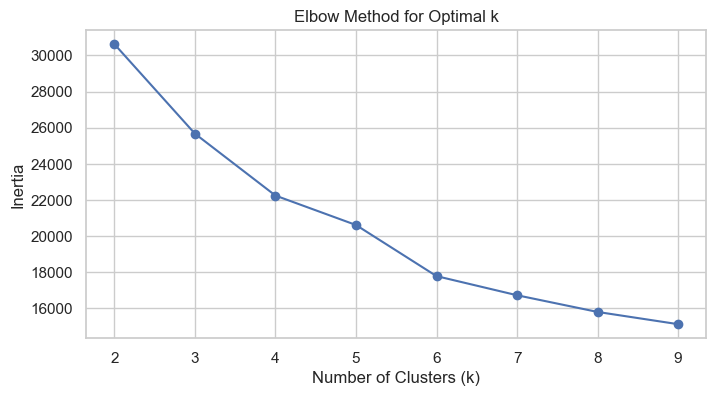

In [48]:
df_km = X_pca.copy()

inertia = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=26)
    kmeans.fit(df_km)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

##### Penentuan Jumlah Klaster dengan Elbow Method

Dengan *Elbow Method*, berdasarkan grafik nilai *inertia*, diketahui titik yang diawali penurunan tajam dan dilanjutkan dengan penurunan landai adalah titik 5. Dengan demikian, ditetapkan jumlah klaster optimal adalah 5 untuk K-Means.

In [49]:
optimal_k = 4  # Misal kita pilih k=5 dari elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=26)
clusters = kmeans.fit_predict(df_km)

##### Visualisasi Cluster dengan PCA

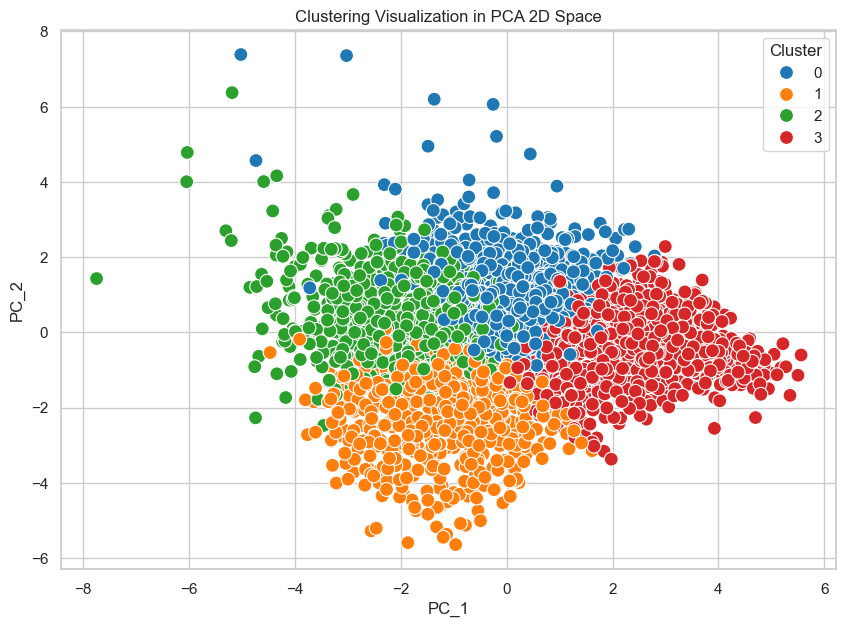

In [50]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

df_vis = pd.DataFrame(X_vis, columns=['PC_1', 'PC_2'])
df_vis['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sb.scatterplot(data=df_vis, x='PC_1', y='PC_2', hue='Cluster', palette='tab10', s=100)
plt.title('Clustering Visualization in PCA 2D Space')
plt.show()

In [52]:
df_vis['Cluster'].value_counts()

Cluster
0    1532
3    1394
2    1275
1     787
Name: count, dtype: int64

#### K-Median

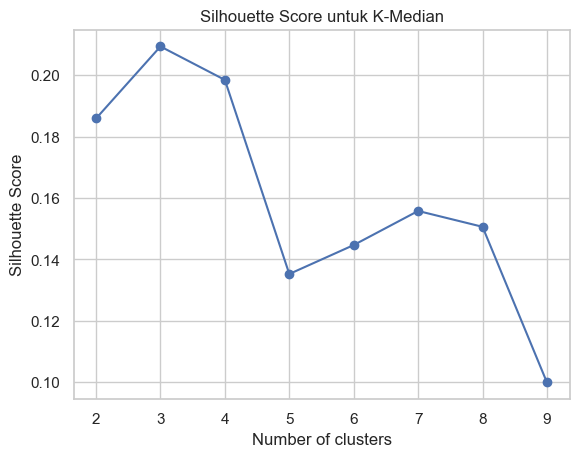

In [51]:
from pyclustering.cluster.kmedians import kmedians
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

df_kme = X_pca.tolist()  # data harus list of lists

silhouette_avg = []

for k in range(2, 10):
    # Tentukan initial medians secara acak, misal ambil k data pertama
    initial_medians = df_kme[:k]

    kmedians_instance = kmedians(df_kme, initial_medians)
    kmedians_instance.process()
    clusters = kmedians_instance.get_clusters()
    medians = kmedians_instance.get_medians()

    # Membuat label array dari clusters
    labels = np.empty(len(df_kme))
    for cluster_id, cluster in enumerate(clusters):
        for index in cluster:
            labels[index] = cluster_id

    # Hitung silhouette score, metric='manhattan' cocok untuk k-median
    score = silhouette_score(np.array(df_kme), labels, metric='manhattan')
    silhouette_avg.append(score)

plt.plot(range(2, 10), silhouette_avg, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk K-Median')
plt.show()

##### Penentuan Jumlah Cluster dengan Silhouette Method

Dengan *Silhouette Method*, berdasarkan grafik nilai *silhouette*, diketahui titik yang memiliki nilai paling tinggi adalah adalah titik 5. Dengan demikian, ditetapkan jumlah cluster optimal adalah 5 untuk K-Medians.

In [53]:
# Gunakan kmeans_plusplus untuk membuat centroid awal
df_kme2 = X_pca.copy()

from sklearn.cluster import kmeans_plusplus

initial_centroids = kmeans_plusplus(df_kme2, n_clusters = 3, random_state=0)[0]
initial_centroids

array([[-2.44397577, -3.0278727 , -0.26595896,  1.16016129,  1.84650308,
        -0.24122023],
       [ 0.66142702,  0.12468784, -0.23292961, -0.49424283,  0.43308125,
        -0.68269144],
       [-2.41607823,  0.5444575 ,  1.79219121,  0.56408595,  0.19771417,
        -0.50183266]])

In [54]:
# Gunakan kmedians dari library pyclustering

from pyclustering.cluster.kmedians import kmedians

k_median = kmedians(df_kme2, initial_centroids)
k_median.process();

In [166]:
import numpy as np

In [55]:
# Mendaftarkan label hasil klaster kmedian

clusters = k_median.get_clusters()

label = np.zeros([X_pca.shape[0]])
label[clusters[0]] = 0
label[clusters[1]] = 1
label[clusters[2]] = 2
# label[clusters[3]] = 3
# label[clusters[4]] = 4

label

array([0., 0., 0., ..., 2., 0., 0.])

In [56]:
# Masukkan klaster ke dalam data

df_pca = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])
df_pca['Cluster'] = label.astype(int)
df_pca.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  Cluster
0  0.328130  0.234018  1.811039  1.058903  0.500168 -1.353747        0
1 -4.037067  0.097075  1.070477 -0.032548  0.234499 -0.263374        0
2 -0.974030  0.083539  0.242175  0.938712  1.003977 -0.506054        0
3 -2.987099  0.149000  2.206097 -0.246384  0.606219 -1.768172        0
4 -0.369390  0.679427  0.777783  0.904958  0.023676 -1.174564        0

##### Visualisasi Cluster dengan PCA

<Axes: xlabel='PC_1', ylabel='PC_2'>

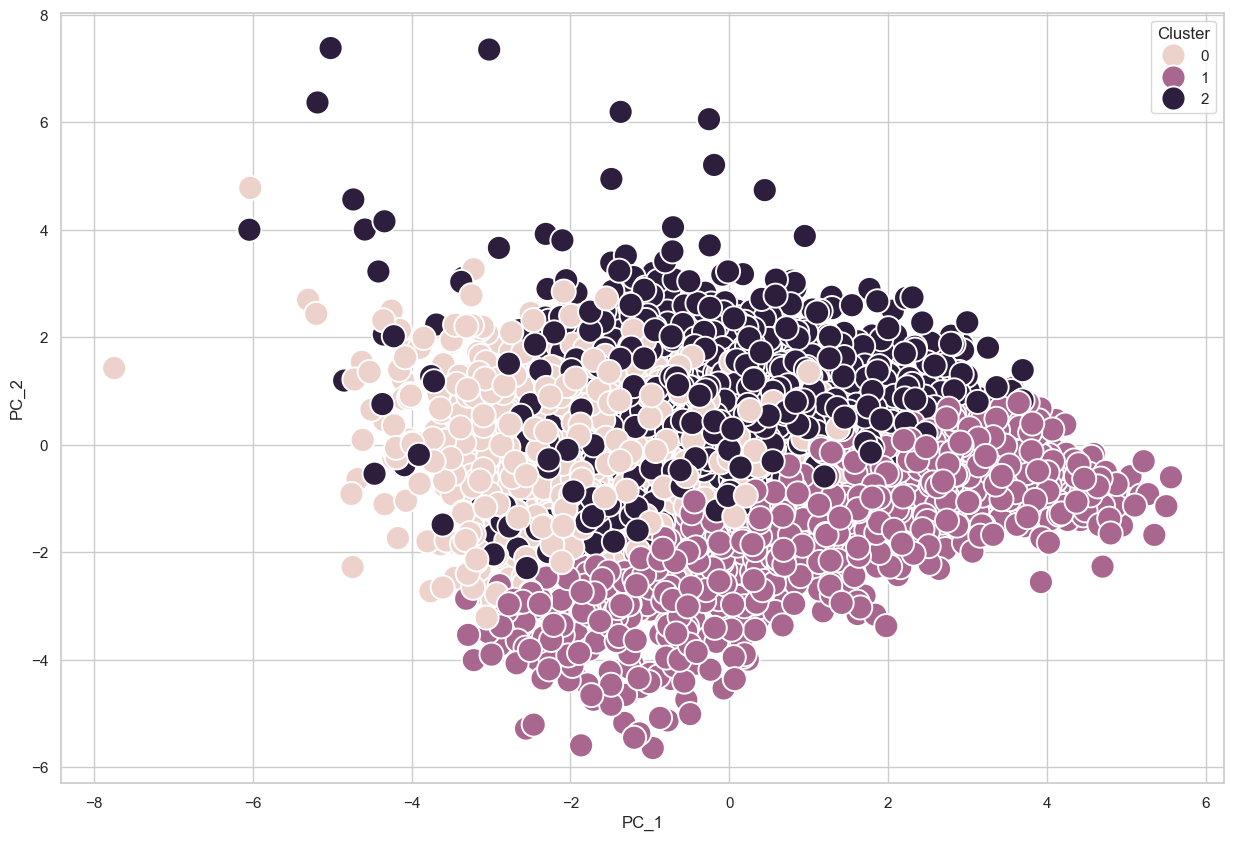

In [57]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data = df_pca, x = 'PC_1', y = 'PC_2', hue = 'Cluster', s = 300, ax = ax)

In [58]:
df_pca['Cluster'].value_counts()

Cluster
2    2128
0    1555
1    1305
Name: count, dtype: int64

#### Agglomerative Hierarchical Clustering

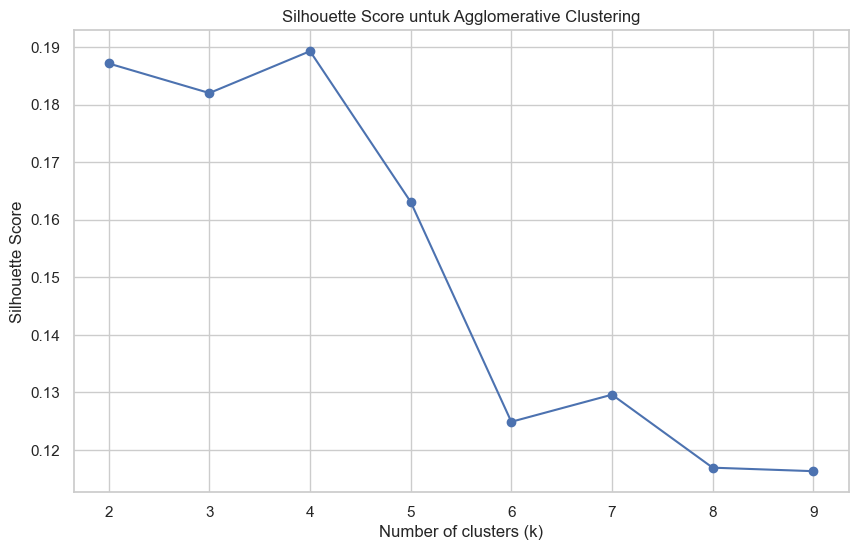

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X = X_pca.copy()  # pastikan isinya numeric

silhouette_avg = []

for k in range(2, 10):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')  # linkage bisa 'ward', 'average', 'complete', 'single'
    labels = agglo.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')  # atau ganti 'manhattan' jika linkage bukan 'ward'
    silhouette_avg.append(score)

# Plot silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_avg, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Agglomerative Clustering')
plt.grid(True)
plt.show()

##### Penentuan Jumlah Cluster dengan Silhouette Method

Dengan *Silhouette Method*, berdasarkan grafik nilai *silhouette*, diketahui titik yang memiliki nilai paling tinggi adalah adalah titik 2. Dengan demikian, ditetapkan jumlah cluster optimal adalah 2 untuk Agglomerative Hierarchical Clustering.

In [60]:
from sklearn.cluster import AgglomerativeClustering

# Final clustering dengan 2 cluster
df_agg = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
agglo_final = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = agglo_final.fit_predict(df_agg)

# Tambahkan label ke dataframe kalau mau
df_agg['cluster'] = cluster_labels

In [61]:
# Cek jumlah data di tiap cluster
print(df_agg['cluster'].value_counts().sort_index())

cluster
0    2554
1    1404
2    1012
3      18
Name: count, dtype: int64


##### Visualisasi Cluster dengan PCA

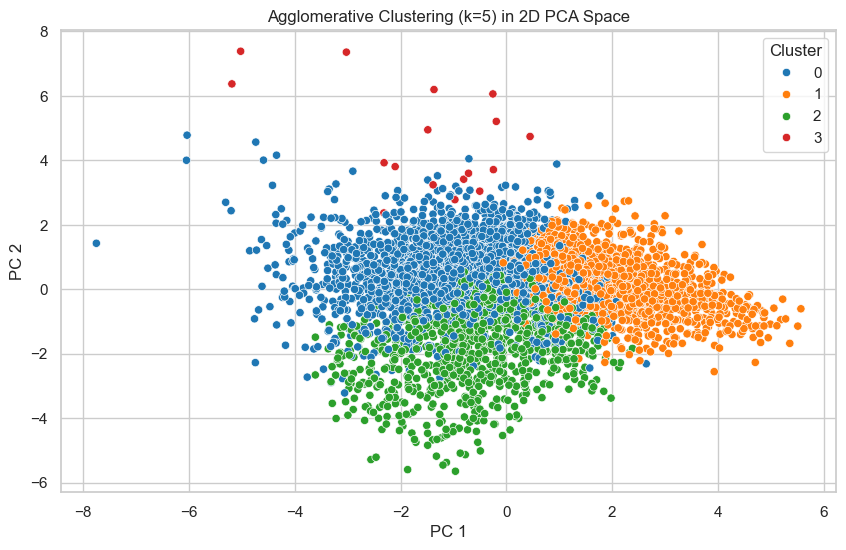

In [62]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_agg.drop(columns='cluster'))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df_agg['cluster'], palette='tab10')
plt.title('Agglomerative Clustering (k=5) in 2D PCA Space')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

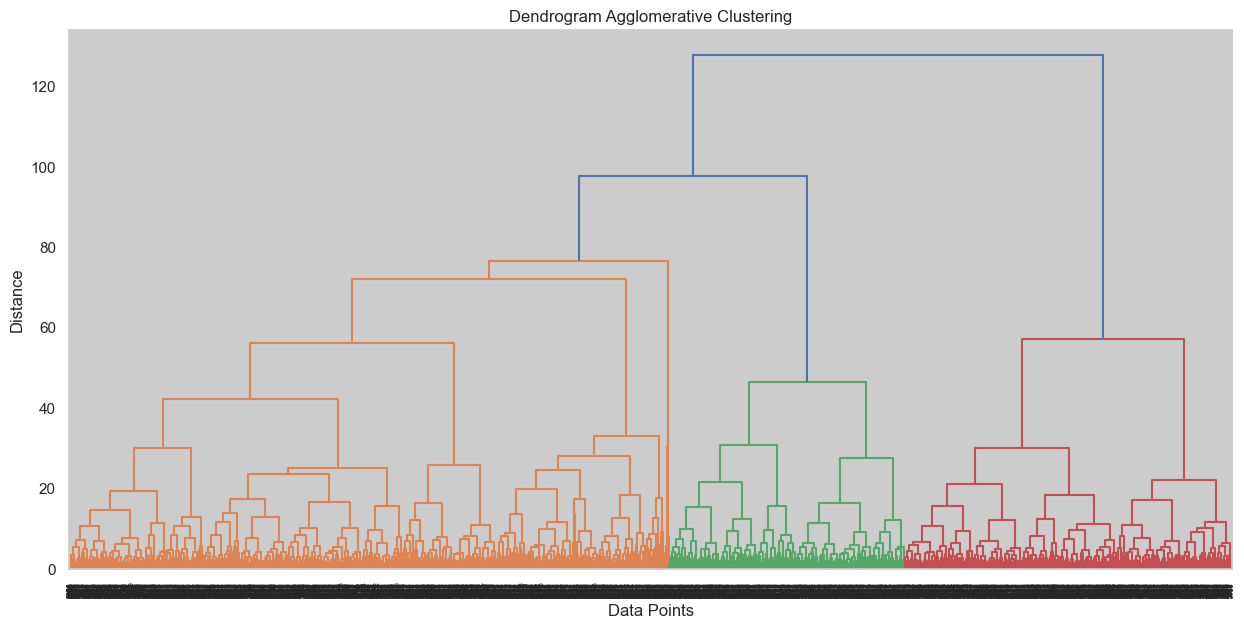

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Pastikan data dalam bentuk array
X = df_agg.drop(columns='cluster', errors='ignore').values  # hapus kolom cluster kalau sudah ada

# Buat linkage matrix (ward linkage untuk hasil yang sesuai dengan AgglomerativeClustering)
linked = linkage(X, method='ward')  # Bisa juga 'average', 'complete', 'single'

# Plot dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,  # True kalau ingin lihat titik-titik datanya
           truncate_mode='level',   # Bisa ubah ke 'lastp' untuk hanya sebagian besar cluster
           p=30                     # Hanya tampilkan 30 cabang atas
          )
plt.title('Dendrogram Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


#### GMM

In [64]:
df_gmm = X_pca.copy()

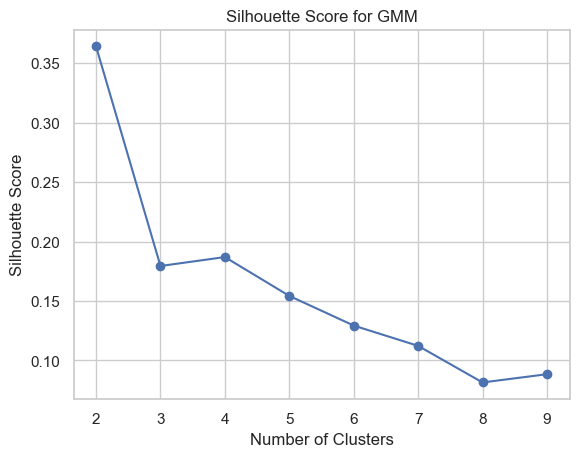

In [65]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

scores = []

for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(df_gmm)
    score = silhouette_score(df_gmm, labels)
    scores.append(score)

plt.plot(range(2, 10), scores, marker='o')
plt.title('Silhouette Score for GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### Penentuan Jumlah Cluster dengan Silhouette Method

Dengan *Silhouette Method*, berdasarkan grafik nilai *silhouette*, diketahui titik yang memiliki nilai paling tinggi adalah adalah titik 3. Dengan demikian, ditetapkan jumlah cluster optimal adalah 3 untuk Gaussian Mixture Method.

In [66]:
# GMM
df_gmm = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
gmm = GaussianMixture(n_components = 2)
gmm.fit(df_gmm)
df_gmm['klaster'] = gmm.predict(df_gmm)

print(df_gmm.klaster.value_counts())
df_gmm.head()

klaster
1    4764
0     224
Name: count, dtype: int64


PC1       PC2       PC3       PC4       PC5       PC6  klaster
0  0.328130  0.234018  1.811039  1.058903  0.500168 -1.353747        1
1 -4.037067  0.097075  1.070477 -0.032548  0.234499 -0.263374        1
2 -0.974030  0.083539  0.242175  0.938712  1.003977 -0.506054        1
3 -2.987099  0.149000  2.206097 -0.246384  0.606219 -1.768172        0
4 -0.369390  0.679427  0.777783  0.904958  0.023676 -1.174564        1

In [67]:
# Dapatkan peluang setiap titik data
prob = gmm.predict_proba(X_pca)

df_gmm2 = df_gmm.copy()
# Tambahkan kolom peluang
for i in range(prob.shape[1]):
    df_gmm2[f'cluster_{i}_probability'] = prob[:, i]

df_gmm2.head(10)

c:\Users\winit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


PC1       PC2       PC3       PC4       PC5       PC6  klaster  cluster_0_probability  cluster_1_probability
0  0.328130  0.234018  1.811039  1.058903  0.500168 -1.353747        1               0.179971               0.820029
1 -4.037067  0.097075  1.070477 -0.032548  0.234499 -0.263374        1               0.008974               0.991026
2 -0.974030  0.083539  0.242175  0.938712  1.003977 -0.506054        1               0.024448               0.975552
3 -2.987099  0.149000  2.206097 -0.246384  0.606219 -1.768172        0               0.884823               0.115177
4 -0.369390  0.679427  0.777783  0.904958  0.023676 -1.174564        1               0.097067               0.902933
5 -1.382888  1.378905  1.781650  0.416625  0.459113  0.125286        1               0.027105               0.972895
6 -2.305977 -0.332030  0.552402  0.030171  0.166523 -0.569640        1               0.001670               0.998330
7  0.098717  1.597588 -0.323264 -0.960931 -0.049094 -0.351728        1               0.000748               0.999252
8  0.143242  1.582432 -0.027777 -0.344376  0.430327 -0.731513        1               0.001655               0.998345
9  0.626600  0.305037 -0.607071 -0.463336  0.497335 -0.603854        1               0.000588               0.999412

##### Visualisasi Cluster dengan PCA

60.661680821432654 %


<Axes: xlabel='PC_1', ylabel='PC_2'>

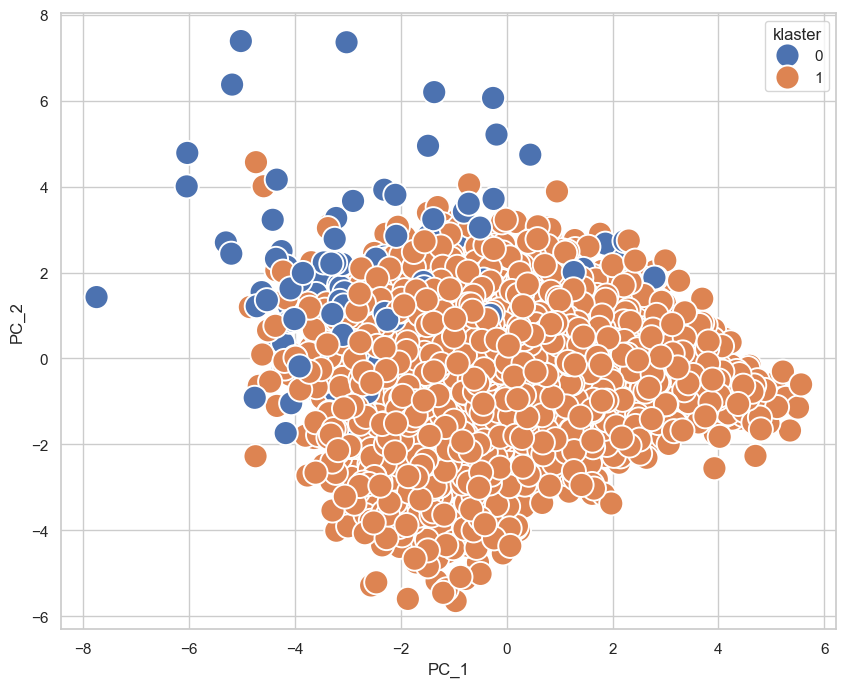

In [68]:
# Gunakan Dimensionality Reduction dengan PCA untuk mempermudah melakukan visualisasi

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_pca2 = pd.DataFrame(pca.fit_transform(df_gmm.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = df_gmm.index)

df_pca2 = pd.concat([df_pca2, df_gmm.klaster], axis = 1)
# df_pca1.head()

print(np.sum(pca.explained_variance_ratio_)*100, "%") # 2 Dimensi dapat menjelaskan keseluruhan fitur
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.scatterplot(data = df_pca2, x = 'PC_1', y = 'PC_2', hue = 'klaster', s = 300, ax = ax)

## Evaluation

In [40]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(X, labels):
    return {
        'Silhouette Score': silhouette_score(X, labels),
        'Davies-Bouldin Index (DBI)': davies_bouldin_score(X, labels),
        'Calinski-Harabasz Index (CH)': calinski_harabasz_score(X, labels)
    }

In [41]:
from IPython.display import display

# Supaya tabel tidak dipotong dan scroll horizontal muncul jika perlu
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

### Skema 1: Tanpa Dimension Reduction

In [44]:
# KMeans
kmeans_labels = kmeans.labels_

# K-Medians (atau bisa pakai K-Medoids kalau pakai sklearn_extra)
kmedians_labels = label.astype(int)

# Agglomerative Clustering
agglo_labels = agglo.labels_

# Gaussian Mixture Model
df_gmm = dat.copy()
gmm_labels = gmm.predict(df_gmm)

In [ ]:
import numpy as np
import pandas as pd

def dunn_index(X, labels):
    X_np = X.values if isinstance(X, pd.DataFrame) else X  # convert ke numpy jika DataFrame
    clusters = np.unique(labels)
    inter_cluster_dist = []
    intra_cluster_diameter = []

    for i in clusters:
        points_i = X_np[labels == i]
        if len(points_i) <= 1:
            intra_diameter_i = 0
        else:
            intra_diameter_i = np.max(np.linalg.norm(points_i[:, None] - points_i[None, :], axis=2))
        intra_cluster_diameter.append(intra_diameter_i)

        for j in clusters:
            if i >= j:
                continue
            points_j = X_np[labels == j]
            inter_dist_ij = np.min(np.linalg.norm(points_i[:, None] - points_j[None, :], axis=2))
            inter_cluster_dist.append(inter_dist_ij)

    if len(inter_cluster_dist) == 0 or max(intra_cluster_diameter) == 0:
        return np.nan  # Kalau gak bisa dihitung
    return np.min(inter_cluster_dist) / max(intra_cluster_diameter)

# Dictionary hasil evaluasi
results = {
    'Method': [],
    'Silhouette Score': [],
    'Davies-Bouldin Index (DBI)': [],
    'Calinski-Harabasz Index (CH)': [],
    'Dunn Index': []
}

# Dictionary labels, dan GMM model
methods = {
    'KMeans': kmeans_labels,
    'KMedians': kmedians_labels.astype(int),
    'Agglomerative': agglo_labels,
    'GMM': gmm_labels
}

# Model GMM (pastikan sudah fitting)
gmm = GaussianMixture(n_components=2).fit(dat)

for method_name, labels in methods.items():
    eval_metrics = evaluate_clustering(dat, labels)
    results['Method'].append(method_name)
    results['Silhouette Score'].append(eval_metrics['Silhouette Score'])
    results['Davies-Bouldin Index (DBI)'].append(eval_metrics['Davies-Bouldin Index (DBI)'])
    results['Calinski-Harabasz Index (CH)'].append(eval_metrics['Calinski-Harabasz Index (CH)'])
    results['Dunn Index'].append(dunn_index(dat, labels))

df_results = pd.DataFrame(results)
print(df_results)


          Method  Silhouette Score  Davies-Bouldin Index (DBI)  Calinski-Harabasz Index (CH)  Dunn Index
0         KMeans          0.197514                    1.572334                   1183.689104    0.012666
1       KMedians          0.694549                    0.656706                    316.344259    0.180095
2  Agglomerative          0.105960                    1.729124                    694.592161    0.029134
3            GMM          0.246928                    2.094550                    615.375557    0.014918


### Skema 2: dengan Dimension Reduction

In [69]:
# KMeans
kmeans_labels = kmeans.labels_

# K-Medians (atau bisa pakai K-Medoids kalau pakai sklearn_extra)
kmedians_labels = label.astype(int)

# Agglomerative Clustering
agglo_labels = agglo.labels_

# Gaussian Mixture Model
gmm_labels = gmm.predict(X_pca)

c:\Users\winit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd

# Fungsi Dunn Index sederhana
def dunn_index(X, labels):
    clusters = np.unique(labels)
    inter_cluster_dist = []
    intra_cluster_diameter = []

    for i in clusters:
        points_i = X[labels == i]
        if len(points_i) <= 1:
            intra_diameter_i = 0
        else:
            intra_diameter_i = np.max(np.linalg.norm(points_i[:, None] - points_i[None, :], axis=2))
        intra_cluster_diameter.append(intra_diameter_i)

        for j in clusters:
            if i >= j:
                continue
            points_j = X[labels == j]
            inter_dist_ij = np.min(np.linalg.norm(points_i[:, None] - points_j[None, :], axis=2))
            inter_cluster_dist.append(inter_dist_ij)
    
    if len(inter_cluster_dist) == 0 or max(intra_cluster_diameter) == 0:
        return np.nan  # Kalau gak bisa dihitung
    return np.min(inter_cluster_dist) / max(intra_cluster_diameter)

# Dictionary hasil evaluasi
results2 = {
    'Method': [],
    'Silhouette Score': [],
    'Davies-Bouldin Index (DBI)': [],
    'Calinski-Harabasz Index (CH)': [],
    'Dunn Index': []
}

# Dictionary labels, dan GMM model
methods = {
    'KMeans': kmeans_labels,
    'KMedians': kmedians_labels.astype(int),
    'Agglomerative': agglo_labels,
    'GMM': gmm_labels
}

# Model GMM (pastikan sudah fitting)
gmm = GaussianMixture(n_components=2).fit(X_pca)

for method_name, labels in methods.items():
    eval_metrics = evaluate_clustering(X_pca, labels)
    results2['Method'].append(method_name)
    results2['Silhouette Score'].append(eval_metrics['Silhouette Score'])
    results2['Davies-Bouldin Index (DBI)'].append(eval_metrics['Davies-Bouldin Index (DBI)'])
    results2['Calinski-Harabasz Index (CH)'].append(eval_metrics['Calinski-Harabasz Index (CH)'])
    results2['Dunn Index'].append(dunn_index(X_pca, labels))

df_results2 = pd.DataFrame(results2)
print(df_results2)


          Method  Silhouette Score  Davies-Bouldin Index (DBI)  Calinski-Harabasz Index (CH)  Dunn Index
0         KMeans          0.222223                    1.426114                   1364.983057    0.005337
1       KMedians          0.163781                    1.792351                    932.598352    0.011027
2  Agglomerative          0.116303                    1.591640                    868.017152    0.014659
3            GMM          0.365065                    2.412917                    216.054057    0.017578


## Profiling

### Inverse Transform PCA ke Data Awal

In [76]:
# Profiling

# Inverse PCA ke bentuk hasil scaling
X_reconstructed = pca_final.inverse_transform(X_pca)

# Inverse scaling ke bentuk asli
X_original = scaler.inverse_transform(X_reconstructed)

# Kembalikan ke DataFrame
df_original = pd.DataFrame(X_original, columns=data_numerik.columns)

# Tambahkan kembali label kategori dan cluster
df_original['Cluster'] = kmeans_labels

In [77]:
df_original.head()

ARSON AND CRIMINAL DAMAGE  BURGLARY  DRUG OFFENCES  MISCELLANEOUS CRIMES AGAINST SOCIETY  POSSESSION OF WEAPONS  PUBLIC ORDER OFFENCES   ROBBERY     THEFT  VEHICLE OFFENCES  Cluster
0                  -0.272256  0.166221       1.365150                              0.736704              -0.499696              -1.395085  1.097442 -0.638582          0.574566        2
1                  -0.428052 -1.802765       2.126916                              0.088664               1.617412               0.964247  1.666547  0.642979         -1.696247        2
2                  -0.328495 -0.599439       1.264356                              0.807126               0.161896              -0.421388 -0.088635  0.268949         -0.397930        2
3                  -0.208658 -1.443595       2.945169                             -0.233937               0.355702              -0.021302  2.305653 -0.049314         -1.031876        2
4                   0.192562 -0.266356       0.946350                              1.056154              -0.326115              -0.441962  0.858424 -0.494407         -0.007054        2

### Visualisasi Proporsi Jenis Kejahatan per Cluster dengan Strip Plot

In [78]:
palette = sns.color_palette("Set2", n_colors=df_original['Cluster'].nunique())

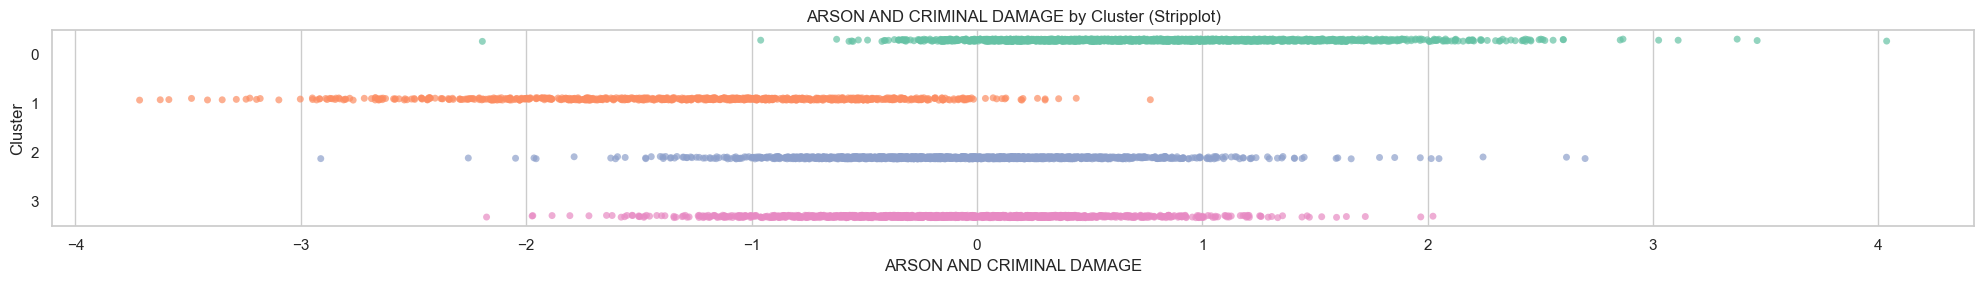

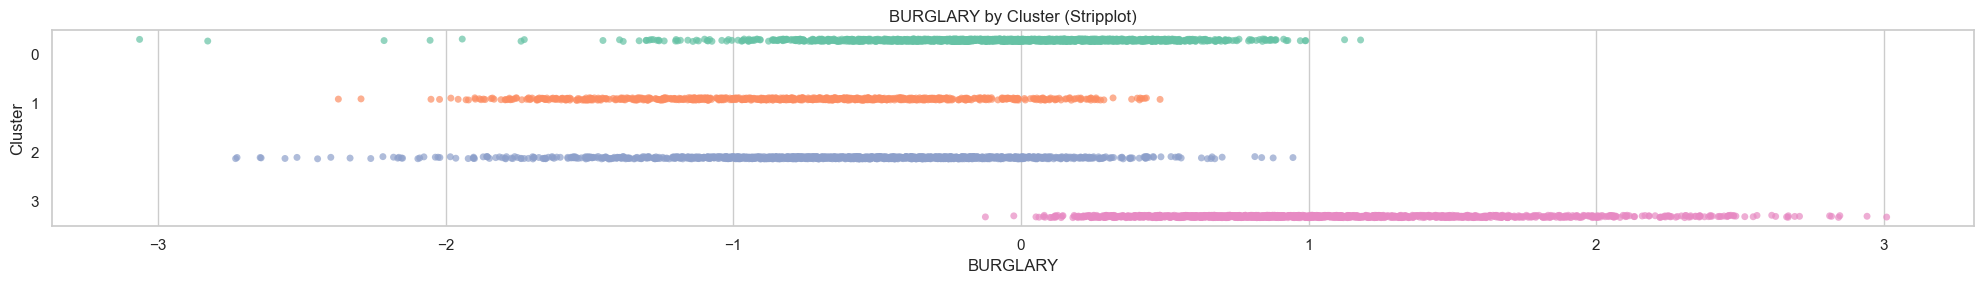

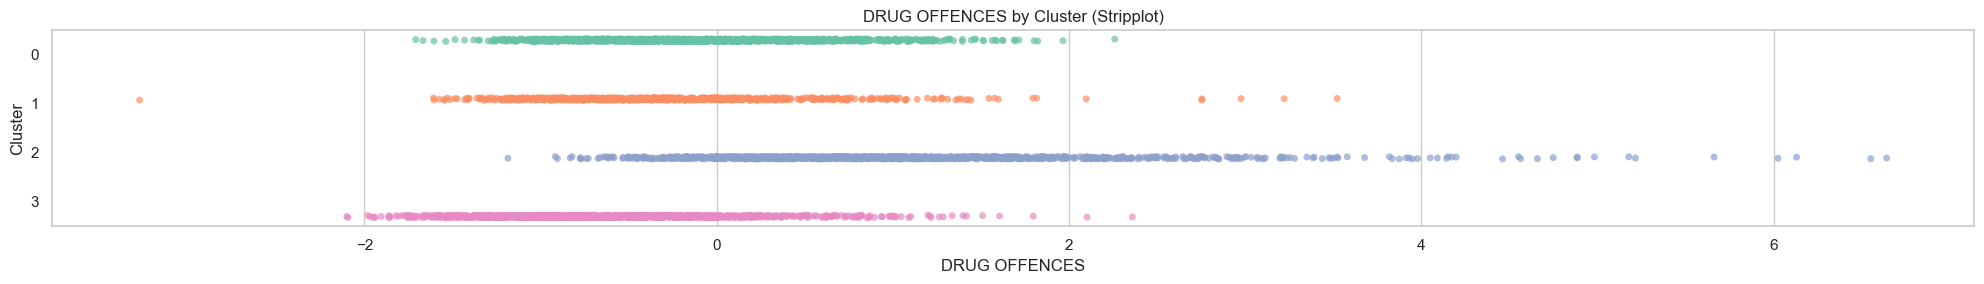

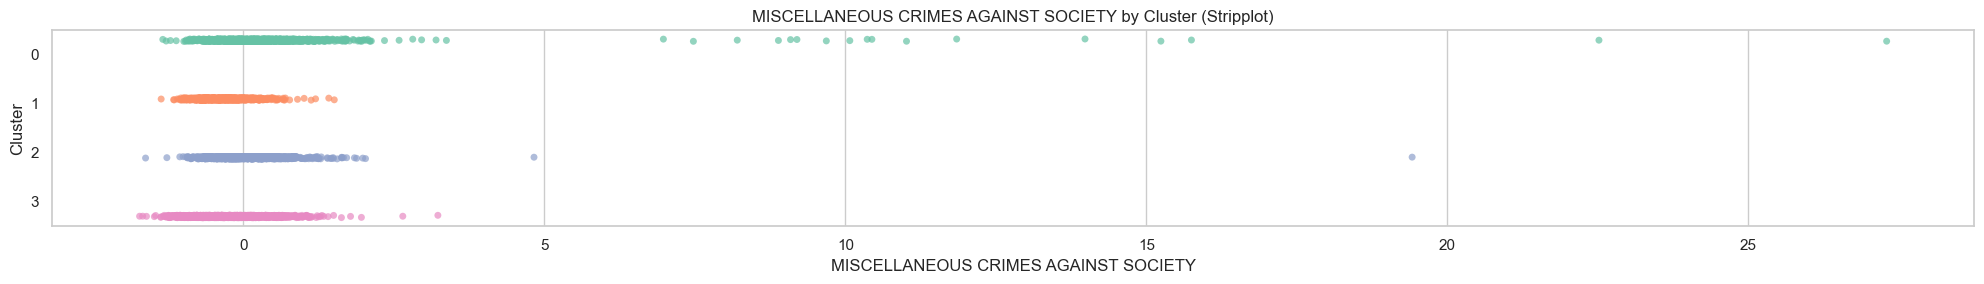

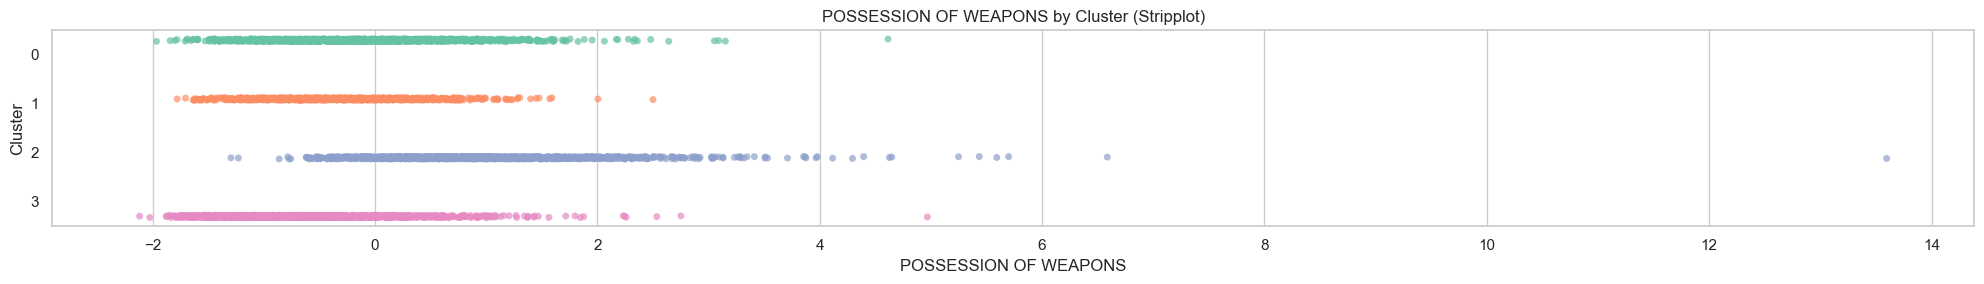

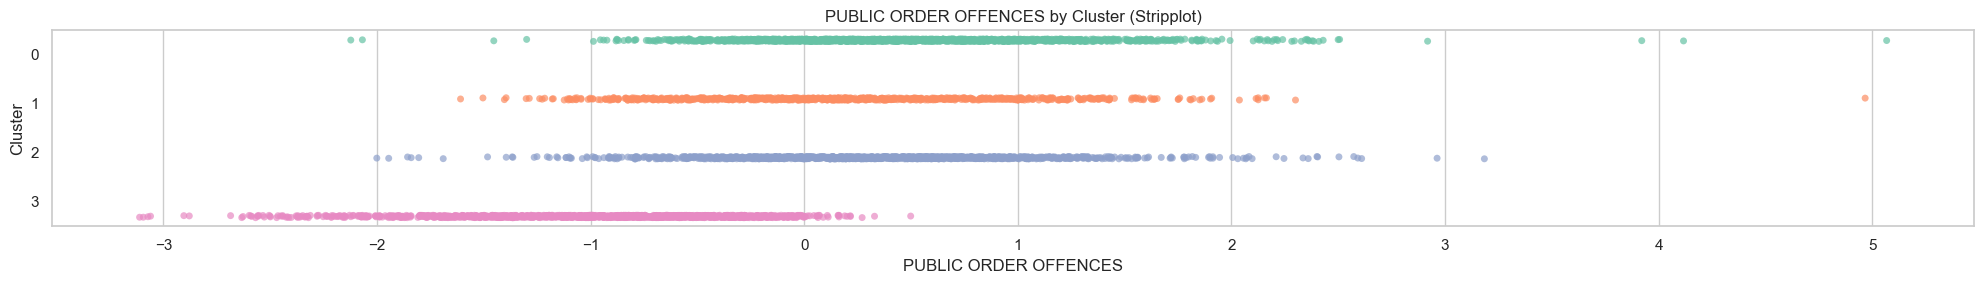

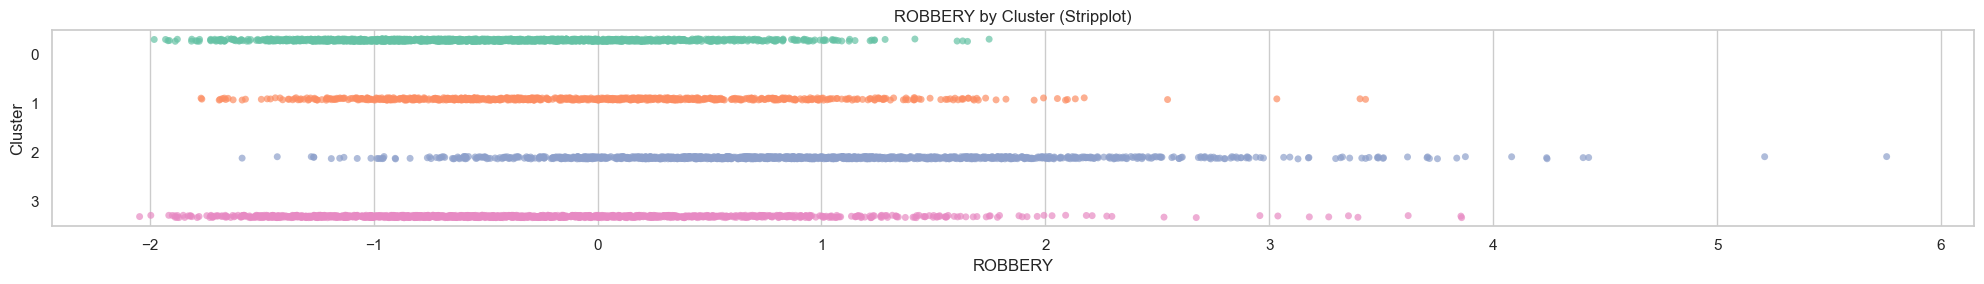

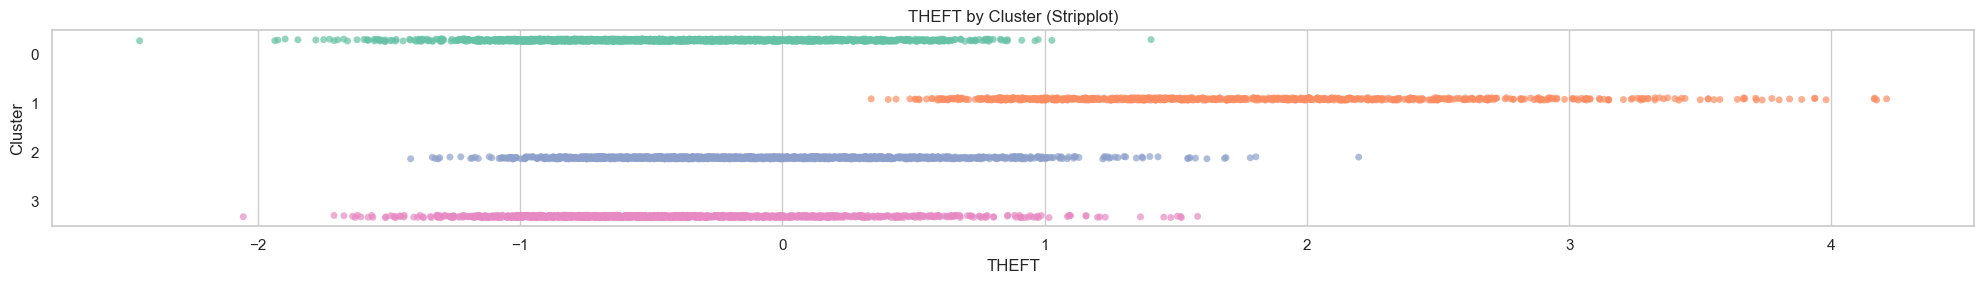

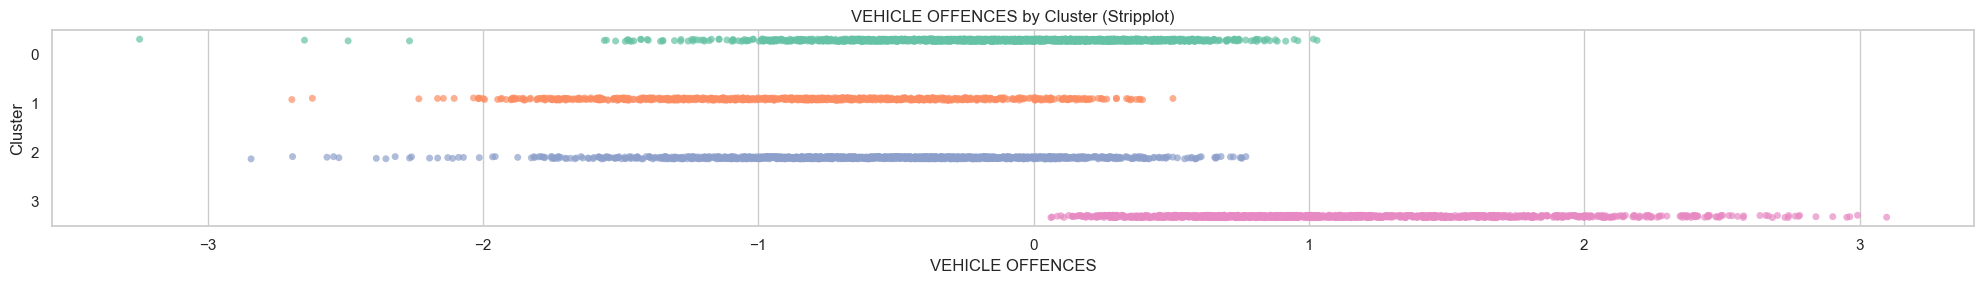

In [79]:
for col in data_numerik.columns:
    plt.figure(figsize=(20, 3))
    sns.stripplot(
        x=col,
        y='Cluster',
        hue='Cluster',
        data=df_original,
        palette=palette,
        size=5,
        alpha=0.7,
        dodge=True,
        jitter=True,   # beri jitter supaya titik tidak segaris
        orient='h'
    )
    plt.title(f'{col} by Cluster (Stripplot)')
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.show()


### Agregasi Data Hasil Clustering

In [80]:
# Misal df_original adalah dataframe kamu

# Pilih kolom numerik saja untuk agregasi numerik
num_cols = df_original.select_dtypes(include=['number']).columns

# Agregasi numerik (min, max, mean) hanya di kolom numerik
agg_num = df_original.groupby('Cluster')[num_cols].agg(['min', 'max', 'mean'])

# Jika ingin menggabungkan hasil, bisa gunakan pd.concat
result = agg_num

In [81]:
result

ARSON AND CRIMINAL DAMAGE                      BURGLARY                     DRUG OFFENCES                     MISCELLANEOUS CRIMES AGAINST SOCIETY                      POSSESSION OF WEAPONS                      PUBLIC ORDER OFFENCES                       ROBBERY                         THEFT                     VEHICLE OFFENCES                     Cluster         
                              min       max      mean       min       max      mean           min       max      mean                                  min        max      mean                   min        max      mean                   min       max      mean       min       max      mean       min       max      mean              min       max      mean     min max mean
Cluster                                                                                                                                                                                                                                                                                                                                                                               
0                       -2.194625  4.036200  0.811853 -3.063893  1.180955 -0.061299     -1.708544  2.259719 -0.115621                            -1.335626  27.295280  0.357583             -1.965061   4.615091 -0.103986             -2.122693  5.067379  0.496969 -1.979769  1.748851 -0.483236 -2.450911  1.405676 -0.441913        -3.246795  1.029836 -0.111177       0   0  0.0
1                       -3.715393  0.769179 -1.262516 -2.372915  0.483857 -0.769123     -3.276051  3.522526 -0.286243                            -1.363352   1.511905 -0.325373             -1.779025   2.500394 -0.316201             -1.608819  4.966748  0.195992 -1.770548  3.429881 -0.030317  0.338662  4.210675  1.753341        -2.693851  0.506316 -0.837009       1   1  1.0
2                       -2.911589  2.698202 -0.069299 -2.730024  0.945899 -0.609647     -1.185081  6.642040  1.024169                            -1.622295  19.414200  0.061964             -1.295875  13.596200  1.002245             -2.000889  3.184184  0.337872 -1.587310  5.757080  0.957122 -1.417275  2.197634 -0.069477        -2.841967  0.771235 -0.551305       2   2  2.0
3                       -2.175974  2.023258 -0.116070 -0.123445  3.009870  1.059189     -2.099667  2.359918 -0.648071                            -1.721361   3.232654 -0.265964             -2.117016   4.968136 -0.623893             -3.111305  0.498459 -0.965845 -2.045067  3.858896 -0.327227 -2.055650  1.583445 -0.440665         0.063178  3.098503  1.098970       3   3  3.0

Kejahatan paling dominan pada _cluster_
- Cluster 0: Arson and Criminal Damage dan Possession of Weapons.
- Cluster 1: Public Order Offences dan Robbery.
- Cluster 2: Drug Offences, Miscellaneous Crimes Against Society, dan Theft.
- Cluster 3: Burglary dan Vehicle Offences.